# The Best Location for Vegetarian Restaurant

# 1. Problem Description

Canadians are going meatless. In September 2018, Charlebois, Somogyi, and Music from Dalhousie University conducted a study, which consisted of an online survey administered to Canadian consumers to determine their attachment to meat consumption and willingness to adopt a plant base diet. The survey was carried out in 3 days and they gathered 1027 samples. Based on this study, Charlebois, Somogyi, and Music estimated that over 6.4 million Canadians prefer to either reduce or eliminate meat consumption. The reasons for Canadians going meatless were found to be related to Health, Animal Welfare, the Environment and Taste.

The study revealed that the typical vegetarian or “to-be-vegetarian” is a woman, who is less than 38 years old, is highly educated, and her income is more than $75,000. Even though, health benefits gained by being a vegetarian seems to be important for both genders, women appear to be more concerned about animal welfare than men. Men, regardless of their age, consider eating meat as a great pleasure in life. Moreover, the less educated men love meat in general.

As Canadians are going meatless, the new restaurants are needed that provide vegetarian meals. Toronto is a very diverse city and full of restaurants, café shops, and fast food places. However, vegetarian restaurants are hard to find, and the goal of this study of “The Best Location for Vegetarian Restaurant in Toronto” is to answer the question: what is the best neighbourhood to open a new vegetarian restaurant? This study uses the profile of the typical vegetarian provided by the Dalhousie study as a base line. First, this study tries to find out the neighbourhoods, where the typical vegetarians live. Once the neighbourhoods have been found, the next step is to find out the existing venues in those neighbourhoods and determine the potential neighbourhood for establishing a vegetarian restaurant.


In [1]:
#Imporing needed libraries
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
from io import StringIO
# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline 
import seaborn as sns
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

print('Libraries imported.')



Libraries imported.


# 2. Data Acquisition and Cleaning

## Dataset Neigbourhood Profiles - Reading the file and cleaning the basics

In [2]:
df = pd.read_csv('C:/data/neighbourhood-profiles.csv')   
df.head()

_id                   Category                      Topic  \
0    1  Neighbourhood Information  Neighbourhood Information   
1    2  Neighbourhood Information  Neighbourhood Information   
2    3                 Population   Population and dwellings   
3    4                 Population   Population and dwellings   
4    5                 Population   Population and dwellings   

                      Data Source               Characteristic  \
0                 City of Toronto         Neighbourhood Number   
1                 City of Toronto         TSNS2020 Designation   
2  Census Profile 98-316-X2016001             Population, 2016   
3  Census Profile 98-316-X2016001             Population, 2011   
4  Census Profile 98-316-X2016001  Population Change 2011-2016   

  City of Toronto Agincourt North Agincourt South-Malvern West  \
0             NaN             129                          128   
1             NaN  No Designation               No Designation   
2       2,731,571          29,113                       23,757   
3       2,615,060          30,279                       21,988   
4           4.50%          -3.90%                        8.00%   

        Alderwood           Annex Banbury-Don Mills  Bathurst Manor  \
0              20              95                42              34   
1  No Designation  No Designation    No Designation  No Designation   
2          12,054          30,526            27,695          15,873   
3          11,904          29,177            26,918          15,434   
4           1.30%           4.60%             2.90%           2.80%   

  Bay Street Corridor Bayview Village Bayview Woods-Steeles  \
0                  76              52                    49   
1      No Designation  No Designation        No Designation   
2              25,797          21,396                13,154   
3              19,348          17,671                13,530   
4              33.30%          21.10%                -2.80%   

  Bedford Park-Nortown Beechborough-Greenbrook         Bendale  \
0                   39                     112             127   
1       No Designation                     NIA  No Designation   
2               23,236                   6,577          29,960   
3               23,185                   6,488          27,876   
4                0.20%                   1.40%           7.50%   

  Birchcliffe-Cliffside Black Creek     Blake-Jones Briar Hill-Belgravia  \
0                   122          24              69                  108   
1        No Designation         NIA  No Designation       No Designation   
2                22,291      21,737           7,727               14,257   
3                21,856      22,057           7,763               14,302   
4                 2.00%      -1.50%          -0.50%               -0.30%   

  Bridle Path-Sunnybrook-York Mills Broadview North Brookhaven-Amesbury  \
0                                41              57                  30   
1                    No Designation  No Designation      No Designation   
2                             9,266          11,499              17,757   
3                             8,713          11,563              17,787   
4                             6.30%          -0.60%              -0.20%   

  Cabbagetown-South St. James Town Caledonia-Fairbank       Casa Loma  \
0                               71                109              96   
1                   No Designation     No Designation  No Designation   
2                           11,669              9,955          10,968   
3                           12,053              9,851          10,487   
4                           -3.20%              1.10%           4.60%   

  Centennial Scarborough Church-Yonge Corridor Clairlea-Birchmount  \
0                    133                    75                 120   
1         No Designation        No Designation      No Designation   
2                 13,362                31,340              26,9

In [3]:
df.columns

Index(['_id', 'Category', 'Topic', 'Data Source', 'Characteristic',
       'City of Toronto', 'Agincourt North', 'Agincourt South-Malvern West',
       'Alderwood', 'Annex',
       ...
       'Unnamed: 153', 'Unnamed: 154', 'Unnamed: 155', 'Unnamed: 156',
       'Unnamed: 157', 'Unnamed: 158', 'Unnamed: 159', 'Unnamed: 160',
       'Unnamed: 161', 'Unnamed: 162'],
      dtype='object', length=163)

In [4]:
df = df[df.columns.drop(list(df.filter(regex='Unnamed')))]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383 entries, 0 to 2382
Columns: 146 entries, _id to Yorkdale-Glen Park
dtypes: int64(1), object(145)
memory usage: 2.7+ MB


### Deleting the columns not needed

In [6]:
del df['_id']

In [7]:
del df['Data Source']

## Extracting Age (25 to 39) and Sex(Females) then Cleaning and Transposing the Data

In [9]:
age = df[df.Topic == 'Age characteristics']

In [11]:
age=age[age.Characteristic.str.contains('Female',case=False) | age.Characteristic.str.contains('Male',case=False)]

In [15]:
age=age[age.Characteristic.str.contains('25 to 29 years',case=False) | \
        age.Characteristic.str.contains('30 to 34 years',case=False) | \
        age.Characteristic.str.contains('35 to 39 years',case=False) ]

In [16]:
age_females_25to39 = age.iloc[3:]

In [17]:
age_females_25to39

Category                Topic          Characteristic City of Toronto  \
41  Population  Age characteristics  Female: 25 to 29 years         119,040   
42  Population  Age characteristics  Female: 30 to 34 years         115,675   
43  Population  Age characteristics  Female: 35 to 39 years         102,240   

   Agincourt North Agincourt South-Malvern West Alderwood Annex  \
41            1005                          975       350  2265   
42             935                          835       430  1675   
43             775                          715       450  1040   

   Banbury-Don Mills Bathurst Manor Bay Street Corridor Bayview Village  \
41               745            480                2440            1145   
42               860            575                1645            1170   
43               895            615                 825             860   

   Bayview Woods-Steeles Bedford Park-Nortown Beechborough-Greenbrook Bendale  \
41                   410                  475                     235    1155   
42                   285                  645                     240    1130   
43                   310                  785                     260     925   

   Birchcliffe-Cliffside Black Creek Blake-Jones Briar Hill-Belgravia  \
41                   555         845         235                  500   
42                   635         805         330                  585   
43                   715         730         355                  600   

   Bridle Path-Sunnybrook-York Mills Broadview North Brookhaven-Amesbury  \
41                               215             480                 660   
42                               170             545                 730   
43                               205             500                 715   

   Cabbagetown-South St. James Town Caledonia-Fairbank Casa Loma  \
41                              490                370       520   
42                              450                405       500   
43                              375                380       365   

   Centennial Scarborough Church-Yonge Corridor Clairlea-Birchmount  \
41                    340                  2745                 915   
42                    350                  2035                1010   
43                    400                  1065                1045   

   Clanton Park Cliffcrest Corso Italia-Davenport Danforth Danforth East York  \
41          595        410                    670      305                395   
42          690        375                    650      415                665   
43          770        450                    610      435                840   

   Don Valley Village Dorset Park Dovercourt-Wallace Emerson-Junction  \
41                970         840                                2255   
42                985         895                                2165   
43               1115         920                                1685   

   Downsview-Roding-CFB Dufferin Grove East End-Danforth  \
41                 1130            840               570   
42                 1310            820               865   
43                 1430            560               930   

   Edenbridge-Humber Valley Eglinton East Elms-Old Rexdale  \
41                      420           785              300   
42                      475           795              325   
43                      440           830              295   

   Englemount-Lawrence Eringate-Centennial-West Deane Etobicoke West Mall  \
41                 700                            455                 475   
42                 780                            485                 440   
43                 910                            525                 380   

   Flemingdon Park Forest Hill North Forest Hill South Glenfield-Jane Heights  \
41             810               440               430                    965   
42             840               515               415     

In [18]:
del age_females_25to39['Category']

In [19]:
del age_females_25to39['Topic']

In [20]:
del age_females_25to39['Characteristic']

In [21]:
age_females_25to39=age_females_25to39.rename(columns={'City of Toronto': 'Neighborhood'})

In [22]:
age_females_25to39.set_index('Neighborhood',inplace=True)

In [23]:
age_females_25to39_transposed = age_females_25to39.transpose()

In [24]:
age_females_25to39_transposed=age_females_25to39_transposed.rename(columns={'119,040':'eka', '115,675':'toka', '102,240':'kolmas'})

In [25]:
object_col = age_females_25to39_transposed.select_dtypes(include=['object']) # This will select object columns only
# list(object_col.columns.values)
for col in object_col.columns.values:
     age_females_25to39_transposed[col] = age_females_25to39_transposed[col].astype('int64')

In [26]:
age_females_25to39_transposed['Female_Total'] = age_females_25to39_transposed.apply(lambda row: row.eka + row.toka + row.kolmas, axis=1)



In [27]:
del age_females_25to39_transposed['eka']

In [28]:
del age_females_25to39_transposed['toka']

In [29]:
del age_females_25to39_transposed['kolmas']

In [30]:
age_females_25to39_transposed.head()

Neighborhood                  Female_Total
Agincourt North                       2715
Agincourt South-Malvern West          2525
Alderwood                             1230
Annex                                 4980
Banbury-Don Mills                     2500

In [31]:
age_females_25to39_transposed.index

Index(['Agincourt North', 'Agincourt South-Malvern West', 'Alderwood', 'Annex',
       'Banbury-Don Mills', 'Bathurst Manor', 'Bay Street Corridor',
       'Bayview Village', 'Bayview Woods-Steeles', 'Bedford Park-Nortown',
       ...
       'Willowdale West', 'Willowridge-Martingrove-Richview', 'Woburn',
       'Woodbine Corridor', 'Woodbine-Lumsden', 'Wychwood', 'Yonge-Eglinton',
       'Yonge-St.Clair', 'York University Heights', 'Yorkdale-Glen Park'],
      dtype='object', length=140)

## Extracting Education (University certificate, diploma or degree at bachelor level or above & Apprenticeship or trades certificate or diploma) then Cleaning and Transposing the Data

In [32]:
education = df[df.Topic == 'Highest certificate, diploma or degree']

In [33]:
education

Category                                   Topic  \
1211  Education  Highest certificate, diploma or degree   
1675  Education  Highest certificate, diploma or degree   
1683  Education  Highest certificate, diploma or degree   
1702  Education  Highest certificate, diploma or degree   
1703  Education  Highest certificate, diploma or degree   
1704  Education  Highest certificate, diploma or degree   
1705  Education  Highest certificate, diploma or degree   
1706  Education  Highest certificate, diploma or degree   
1707  Education  Highest certificate, diploma or degree   
1708  Education  Highest certificate, diploma or degree   
1709  Education  Highest certificate, diploma or degree   
1710  Education  Highest certificate, diploma or degree   
1711  Education  Highest certificate, diploma or degree   
1712  Education  Highest certificate, diploma or degree   
1713  Education  Highest certificate, diploma or degree   
1714  Education  Highest certificate, diploma or degree   
1715  Education  Highest certificate, diploma or degree   
1716  Education  Highest certificate, diploma or degree   
1717  Education  Highest certificate, diploma or degree   
1718  Education  Highest certificate, diploma or degree   
1719  Education  Highest certificate, diploma or degree   
1720  Education  Highest certificate, diploma or degree   
1721  Education  Highest certificate, diploma or degree   
1722  Education  Highest certificate, diploma or degree   
1723  Education  Highest certificate, diploma or degree   
1724  Education  Highest certificate, diploma or degree   
1725  Education  Highest certificate, diploma or degree   
1726  Education  Highest certificate, diploma or degree   
1727  Education  Highest certificate, diploma or degree   
1728  Education  Highest certificate, diploma or degree   

                                         Characteristic City of Toronto  \
1211                                    Master's degree          192120   
1675       Postsecondary certificate, diploma or degree         1356360   
1683      Apprenticeship or trades certificate or di...           94005   
1702  Total - Highest certificate, diploma or degree...         2294785   
1703                  No certificate, diploma or degree          377340   
1704    Secondary (high) school diploma or equivalen...          561090   
1705        Trades certificate or diploma other than...           53060   
1706        Certificate of Apprenticeship or Certifi...           40945   
1707      College, CEGEP or other non-university cer...          362080   
1708      University certificate or diploma below ba...           65015   
1709      University certificate, diploma or degree ...          835260   
1710                                  Bachelor's degree          534610   
1711        University certificate or diploma above ...           54570   
1712        Degree in medicine, dentistry, veterinar...           23540   
1713                                   Earned doctorate           30415   
1714  Total - Highest certificate, diploma or degree...         1554815   
1715                  No certificate, diploma or degree          159795   
1716    Secondary (high) school diploma or equivalen...          317080   
1717       Postsecondary certificate, diploma or degree         1077935   
1718      Apprenticeship or trades certificate or di...           63315   
1719        Trades certificate or diploma other than...           36000   
1720                                    Master's degree          166405   
1721        Certificate of Apprenticeship or Certifi...           27315   
1722      College, CEGEP or other non-university cer...          279675   
1723      University certificate or diploma below ba...           48700   
1724      University certificate, diploma or degree ...          686245   
1725                                  Bachelor's degree          433620   
1726        University certificate or diploma above ...           43840   
17

In [34]:
education=education[education.Characteristic.str.contains('University certificate, diploma or degree at bachelor level or above',case=False) | \
          education.Characteristic.str.contains('Apprenticeship or trades certificate or diploma',case=False) ]


In [35]:
education

Category                                   Topic  \
1683  Education  Highest certificate, diploma or degree   
1709  Education  Highest certificate, diploma or degree   
1718  Education  Highest certificate, diploma or degree   
1724  Education  Highest certificate, diploma or degree   

                                         Characteristic City of Toronto  \
1683      Apprenticeship or trades certificate or di...           94005   
1709      University certificate, diploma or degree ...          835260   
1718      Apprenticeship or trades certificate or di...           63315   
1724      University certificate, diploma or degree ...          686245   

     Agincourt North Agincourt South-Malvern West Alderwood  Annex  \
1683             885                          705       690    530   
1709            5805                         5765      2290  16590   
1718             520                          460       445    365   
1724            4240                         4615      1980  12640   

     Banbury-Don Mills Bathurst Manor Bay Street Corridor Bayview Village  \
1683               805            610                 265             365   
1709             10850           4980               15090            9790   
1718               400            385                 170             240   
1724              8060           4030               11660            7910   

     Bayview Woods-Steeles Bedford Park-Nortown Beechborough-Greenbrook  \
1683                   410                  525                     470   
1709                  5120                 9625                     610   
1718                   200                  320                     375   
1724                  3640                 7350                     505   

     Bendale Birchcliffe-Cliffside Black Creek Blake-Jones  \
1683    1015                   885        1090         285   
1709    6295                  5170        1565        2435   
1718     620                   640         785         220   
1724    5065                  4295        1300        2190   

     Briar Hill-Belgravia Bridle Path-Sunnybrook-York Mills Broadview North  \
1683                  695                               110             485   
1709                 3405                              4795            3510   
1718                  485                                55             320   
1724                 2990                              3500            3025   

     Brookhaven-Amesbury Cabbagetown-South St. James Town Caledonia-Fairbank  \
1683                1055                              335                580   
1709                1920                             5105               1160   
1718                 795                              250                455   
1724                1630                             4020               1030   

     Casa Loma Centennial Scarborough Church-Yonge Corridor  \
1683       215                    450                   765   
1709      5920                   4055                 16930   
1718       120                    275                   595   
1724      4140                   3120                 13765   

     Clairlea-Birchmount Clanton Park Cliffcrest Corso Italia-Davenport  \
1683                1085          625        595                    725   
1709                5755         5290       3640                   3285   
1718                 710          420        365                    550   
1724                5105         4495       2925                   2905   

     Danforth Danforth East York Don Valley Village Dorset Park  \
1683      240                555                730        1030   
1709     3295               5255               9675        4945   
1718      150                380                540         725   
1724     2935               4735               7765        4240   

     Dovercourt-Wallace Emerson-Junction Downsview-Roding-CFB Dufferin Grove  \
1683  

In [36]:
education = education.iloc[2:]

In [37]:
del education['Category']

In [38]:
del education['Topic']

In [39]:
del education['Characteristic']

In [40]:
education

City of Toronto Agincourt North Agincourt South-Malvern West Alderwood  \
1718           63315             520                          460       445   
1724          686245            4240                         4615      1980   

      Annex Banbury-Don Mills Bathurst Manor Bay Street Corridor  \
1718    365               400            385                 170   
1724  12640              8060           4030               11660   

     Bayview Village Bayview Woods-Steeles Bedford Park-Nortown  \
1718             240                   200                  320   
1724            7910                  3640                 7350   

     Beechborough-Greenbrook Bendale Birchcliffe-Cliffside Black Creek  \
1718                     375     620                   640         785   
1724                     505    5065                  4295        1300   

     Blake-Jones Briar Hill-Belgravia Bridle Path-Sunnybrook-York Mills  \
1718         220                  485                                55   
1724        2190                 2990                              3500   

     Broadview North Brookhaven-Amesbury Cabbagetown-South St. James Town  \
1718             320                 795                              250   
1724            3025                1630                             4020   

     Caledonia-Fairbank Casa Loma Centennial Scarborough  \
1718                455       120                    275   
1724               1030      4140                   3120   

     Church-Yonge Corridor Clairlea-Birchmount Clanton Park Cliffcrest  \
1718                   595                 710          420        365   
1724                 13765                5105         4495       2925   

     Corso Italia-Davenport Danforth Danforth East York Don Valley Village  \
1718                    550      150                380                540   
1724                   2905     2935               4735               7765   

     Dorset Park Dovercourt-Wallace Emerson-Junction Downsview-Roding-CFB  \
1718         725                                 975                 1365   
1724        4240                                9680                 3835   

     Dufferin Grove East End-Danforth Edenbridge-Humber Valley Eglinton East  \
1718            290               480                      380           755   
1724           3605              5980                     4020          3040   

     Elms-Old Rexdale Englemount-Lawrence Eringate-Centennial-West Deane  \
1718              345                 555                            475   
1724              930                4715                           3910   

     Etobicoke West Mall Flemingdon Park Forest Hill North Forest Hill South  \
1718                 390             465               280                75   
1724                2280            4025              4120              4015   

     Glenfield-Jane Heights Greenwood-Coxwell Guildwood Henry Farm  \
1718                   1010               310       235        325   
1724                   1710              4180      2055       5385   

     High Park North High Park-Swansea Highland Creek Hillcrest Village  \
1718             400               400            325               175   
1724            8805              8965           2225              4765   

     Humber Heights-Westmount Humber Summit Humbermede Humewood-Cedarvale  \
1718                      345           410        545                260   
1724                     1745          1200       1650               5020   

     Ionview Islington-City Centre West Junction Area  \
1718     400                       1145           355   
1724    2240                      12520          4505   

     Keelesdale-Eglinton West Kennedy Park Kensington-Chinatown  \
1718                      330          585                  320   
1724                      975         2480                 5025   

     Kingsview Village-The Westway Kingsway South Lamb

In [41]:
education=education.rename(columns={'City of Toronto': 'Neighborhood'})

In [42]:
education.set_index('Neighborhood',inplace=True)

In [43]:
education_transposed = education.transpose()

In [44]:
education_transposed.head()

Neighborhood                 63315 686245
Agincourt North                520   4240
Agincourt South-Malvern West   460   4615
Alderwood                      445   1980
Annex                          365  12640
Banbury-Don Mills              400   8060

In [45]:
education_transposed=education_transposed.rename(columns={'63315':'eka', '686245':'toka'})

In [46]:
education_transposed.head()

Neighborhood                  eka   toka
Agincourt North               520   4240
Agincourt South-Malvern West  460   4615
Alderwood                     445   1980
Annex                         365  12640
Banbury-Don Mills             400   8060

In [47]:
object_col = education_transposed.select_dtypes(include=['object']) # This will select object columns only
# list(object_col.columns.values)
for col in object_col.columns.values:
     education_transposed[col] = education_transposed[col].astype('int64')

In [48]:
education_transposed['High_Education_Total'] = education_transposed.apply(lambda row: row.eka + row.toka, axis=1)

In [49]:
education_transposed.head()

Neighborhood                  eka   toka  High_Education_Total
Agincourt North               520   4240                  4760
Agincourt South-Malvern West  460   4615                  5075
Alderwood                     445   1980                  2425
Annex                         365  12640                 13005
Banbury-Don Mills             400   8060                  8460

In [50]:
del education_transposed['eka']

In [51]:
del education_transposed['toka']

In [52]:
education_transposed.head()

Neighborhood                  High_Education_Total
Agincourt North                               4760
Agincourt South-Malvern West                  5075
Alderwood                                     2425
Annex                                        13005
Banbury-Don Mills                             8460

## Extracting Income ($70,000 or over) then Cleaning and Transposing the Data

In [53]:
income = df[df.Topic == 'Income of individuals in 2015']

In [54]:
income

Category                          Topic  \
426    Income  Income of individuals in 2015   
615    Income  Income of individuals in 2015   
669    Income  Income of individuals in 2015   
812    Income  Income of individuals in 2015   
827    Income  Income of individuals in 2015   
839    Income  Income of individuals in 2015   
860    Income  Income of individuals in 2015   
929    Income  Income of individuals in 2015   
944    Income  Income of individuals in 2015   
945    Income  Income of individuals in 2015   
946    Income  Income of individuals in 2015   
947    Income  Income of individuals in 2015   
948    Income  Income of individuals in 2015   
949    Income  Income of individuals in 2015   
950    Income  Income of individuals in 2015   
951    Income  Income of individuals in 2015   
952    Income  Income of individuals in 2015   
953    Income  Income of individuals in 2015   
954    Income  Income of individuals in 2015   
955    Income  Income of individuals in 2015   
956    Income  Income of individuals in 2015   
957    Income  Income of individuals in 2015   
958    Income  Income of individuals in 2015   
959    Income  Income of individuals in 2015   
960    Income  Income of individuals in 2015   
961    Income  Income of individuals in 2015   
962    Income  Income of individuals in 2015   
963    Income  Income of individuals in 2015   
964    Income  Income of individuals in 2015   
965    Income  Income of individuals in 2015   
966    Income  Income of individuals in 2015   
967    Income  Income of individuals in 2015   
968    Income  Income of individuals in 2015   
969    Income  Income of individuals in 2015   
970    Income  Income of individuals in 2015   
971    Income  Income of individuals in 2015   
972    Income  Income of individuals in 2015   
973    Income  Income of individuals in 2015   
974    Income  Income of individuals in 2015   
975    Income  Income of individuals in 2015   
976    Income  Income of individuals in 2015   
977    Income  Income of individuals in 2015   
978    Income  Income of individuals in 2015   
979    Income  Income of individuals in 2015   
980    Income  Income of individuals in 2015   
981    Income  Income of individuals in 2015   
982    Income  Income of individuals in 2015   
983    Income  Income of individuals in 2015   
984    Income  Income of individuals in 2015   
985    Income  Income of individuals in 2015   
986    Income  Income of individuals in 2015   
987    Income  Income of individuals in 2015   
988    Income  Income of individuals in 2015   
989    Income  Income of individuals in 2015   
990    Income  Income of individuals in 2015   
991    Income  Income of individuals in 2015   
992    Income  Income of individuals in 2015   
993    Income  Income of individuals in 2015   
994    Income  Income of individuals in 2015   
995    Income  Income of individuals in 2015   
996    Income  Income of individuals in 2015   
997    Income  Income of individuals in 2015   
998    Income  Income of individuals in 2015   
999    Income  Income of individuals in 2015   
1000   Income  Income of individuals in 2015   
1001   Income  Income of individuals in 2015   
1002   Income  Income of individuals in 2015   
1003   Income  Income of individuals in 2015   
1004   Income  Income of individuals in 2015   
1005   Income  Income of individuals in 2015   
1006   Income  Income of individuals in 2015   
1007   Income  Income of individuals in 2015   
1008   Income  Income of individuals in 2015   
1009   Income  Income of individuals in 2015   
1010   Income  Income of individuals in 2015   
1011   Income  Income of individuals in 2015   
1012   Income  Income of individuals in 2015   
1013   Income  Income of individuals in 2015   
1015   Income  Income of individuals in 2015   
1016   Income  Income of individuals in 2015   

                                         Characteristic City of Toronto  \
426                                  $60,

In [55]:
#For some reason the dataframe blurs a dollar sign - it cannot be used       
income=income[income.Characteristic.str.contains('79,999',case=False) | \
       income.Characteristic.str.contains('80,000 and over',case=False) ]

In [56]:
income

Category                          Topic          Characteristic  \
615    Income  Income of individuals in 2015      $70,000 to $79,999   
995    Income  Income of individuals in 2015      $70,000 to $79,999   
996    Income  Income of individuals in 2015        $80,000 and over   
1011   Income  Income of individuals in 2015      $70,000 to $79,999   
1012   Income  Income of individuals in 2015        $80,000 and over   

     City of Toronto Agincourt North Agincourt South-Malvern West Alderwood  \
615           89,645             655                          570       530   
995           84,300             525                          500       510   
996          208,615             720                          710       830   
1011          72,190             460                          460       455   
1012         273,760           1,160                        1,135     1,415   

      Annex Banbury-Don Mills Bathurst Manor Bay Street Corridor  \
615   1,290             1,220            535               1,090   
995   1,215             1,135            470               1,125   
996   5,200             3,675          1,140               2,715   
1011    915               795            430                 905   
1012  5,095             3,890          1,480               3,420   

     Bayview Village Bayview Woods-Steeles Bedford Park-Nortown  \
615              870                   455                  755   
995              860                   455                  810   
996            2,035                 1,180                5,155   
1011             660                   300                  460   
1012           2,440                 1,230                4,370   

     Beechborough-Greenbrook Bendale Birchcliffe-Cliffside Black Creek  \
615                      140     850                   885         245   
995                       95     635                   895         150   
996                      125     800                 2,035         110   
1011                     120     650                   655         195   
1012                     235   1,450                 2,845         270   

     Blake-Jones Briar Hill-Belgravia Bridle Path-Sunnybrook-York Mills  \
615          260                  415                               280   
995          260                  305                               375   
996          765                  450                             2,780   
1011         215                  365                               160   
1012       1,040                  825                             2,075   

     Broadview North Brookhaven-Amesbury Cabbagetown-South St. James Town  \
615              415                 350                              485   
995              360                 280                              510   
996              750                 300                            1,540   
1011             340                 315                              400   
1012           1,110                 630                            1,875   

     Caledonia-Fairbank Casa Loma Centennial Scarborough  \
615                 340       450                    625   
995                 195       495                    670   
996                 235     2,530                  1,405   
1011                285       295                    460   
1012                510     2,150                  1,935   

     Church-Yonge Corridor Clairlea-Birchmount Clanton Park Cliffcrest  \
615                  1,650                 830          550        550   
995                  1,500                 725          540        545   
996                  3,305                 855        1,450      1,105   
1011                 1,410                 745          395        425   
1012                 4,870               1,690        1,765      1,580   

     Corso Italia-Davenport Danforth Danforth East York Don Valley Village  \
615                     540      370      

In [57]:
#Based n the csv-file, the last two are the ones I'm looking for
income = income.iloc[3:]

In [58]:
income

Category                          Topic          Characteristic  \
1011   Income  Income of individuals in 2015      $70,000 to $79,999   
1012   Income  Income of individuals in 2015        $80,000 and over   

     City of Toronto Agincourt North Agincourt South-Malvern West Alderwood  \
1011          72,190             460                          460       455   
1012         273,760           1,160                        1,135     1,415   

      Annex Banbury-Don Mills Bathurst Manor Bay Street Corridor  \
1011    915               795            430                 905   
1012  5,095             3,890          1,480               3,420   

     Bayview Village Bayview Woods-Steeles Bedford Park-Nortown  \
1011             660                   300                  460   
1012           2,440                 1,230                4,370   

     Beechborough-Greenbrook Bendale Birchcliffe-Cliffside Black Creek  \
1011                     120     650                   655         195   
1012                     235   1,450                 2,845         270   

     Blake-Jones Briar Hill-Belgravia Bridle Path-Sunnybrook-York Mills  \
1011         215                  365                               160   
1012       1,040                  825                             2,075   

     Broadview North Brookhaven-Amesbury Cabbagetown-South St. James Town  \
1011             340                 315                              400   
1012           1,110                 630                            1,875   

     Caledonia-Fairbank Casa Loma Centennial Scarborough  \
1011                285       295                    460   
1012                510     2,150                  1,935   

     Church-Yonge Corridor Clairlea-Birchmount Clanton Park Cliffcrest  \
1011                 1,410                 745          395        425   
1012                 4,870               1,690        1,765      1,580   

     Corso Italia-Davenport Danforth Danforth East York Don Valley Village  \
1011                    480      330                615                610   
1012                  1,235    1,545              2,620              1,860   

     Dorset Park Dovercourt-Wallace Emerson-Junction Downsview-Roding-CFB  \
1011         470                               1,200                  750   
1012         950                               3,270                1,510   

     Dufferin Grove East End-Danforth Edenbridge-Humber Valley Eglinton East  \
1011            440               650                      340           320   
1012          1,025             3,230                    2,200           635   

     Elms-Old Rexdale Englemount-Lawrence Eringate-Centennial-West Deane  \
1011              175                 380                            630   
1012              370               1,545                          2,055   

     Etobicoke West Mall Flemingdon Park Forest Hill North Forest Hill South  \
1011                 335             295               310               285   
1012                 750             680             1,795             2,035   

     Glenfield-Jane Heights Greenwood-Coxwell Guildwood Henry Farm  \
1011                    370               525       335        465   
1012                    550             1,915     1,285      1,075   

     High Park North High Park-Swansea Highland Creek Hillcrest Village  \
1011             810               865            310               375   
1012           3,505             4,390          1,105             1,365   

     Humber Heights-Westmount Humber Summit Humbermede Humewood-Cedarvale  \
1011                      295           190        235                365   
1012                      945           375        410              1,980   

     Ionview Islington-City Centre West Junction Area  \
1011     295                      1,555           535   
1012     405                      5,450         1,815   

     Keelesdale-Eglinton West Kennedy P

In [59]:
del income['Category']

In [60]:
del income['Topic']

In [61]:
del income['Characteristic']

In [62]:
income=income.rename(columns={'City of Toronto': 'Neighborhood'})

In [63]:
income.set_index('Neighborhood',inplace=True)

In [64]:
income_transposed = income.transpose()

In [65]:
income_transposed.head()

Neighborhood                 72,190 273,760
Agincourt North                 460   1,160
Agincourt South-Malvern West    460   1,135
Alderwood                       455   1,415
Annex                           915   5,095
Banbury-Don Mills               795   3,890

In [66]:
income_transposed=income_transposed.rename(columns={'72,190':'eka', '273,760':'toka'})

In [67]:
income_transposed.head()

Neighborhood                  eka   toka
Agincourt North               460  1,160
Agincourt South-Malvern West  460  1,135
Alderwood                     455  1,415
Annex                         915  5,095
Banbury-Don Mills             795  3,890

In [68]:
#For some reason, comma bothered, whch needed to take away
income_transposed = income_transposed.apply(lambda x: x.str.replace(',', ''))

In [69]:
object_col = income_transposed.select_dtypes(include=['object']) # This will select object columns only
# list(object_col.columns.values)
for col in object_col.columns.values:
    income_transposed[col] = income_transposed[col].astype('int64')

In [70]:
income_transposed['70K+_Total'] = income_transposed.apply(lambda row: row.eka + row.toka, axis=1)

In [71]:
income_transposed.head()

Neighborhood                  eka  toka  70K+_Total
Agincourt North               460  1160        1620
Agincourt South-Malvern West  460  1135        1595
Alderwood                     455  1415        1870
Annex                         915  5095        6010
Banbury-Don Mills             795  3890        4685

In [72]:
del income_transposed['eka']

In [73]:
del income_transposed['toka']

In [74]:
income_transposed.head()

Neighborhood                  70K+_Total
Agincourt North                     1620
Agincourt South-Malvern West        1595
Alderwood                           1870
Annex                               6010
Banbury-Don Mills                   4685

## Extracing the First row (Area Code) in order to add all the rest of the information into the same dataframe, cleaning, and transposing

In [75]:
df2=df.iloc[:1]

In [76]:
df2.head()

Category                      Topic        Characteristic  \
0  Neighbourhood Information  Neighbourhood Information  Neighbourhood Number   

  City of Toronto Agincourt North Agincourt South-Malvern West Alderwood  \
0             NaN             129                          128        20   

  Annex Banbury-Don Mills Bathurst Manor Bay Street Corridor Bayview Village  \
0    95                42             34                  76              52   

  Bayview Woods-Steeles Bedford Park-Nortown Beechborough-Greenbrook Bendale  \
0                    49                   39                     112     127   

  Birchcliffe-Cliffside Black Creek Blake-Jones Briar Hill-Belgravia  \
0                   122          24          69                  108   

  Bridle Path-Sunnybrook-York Mills Broadview North Brookhaven-Amesbury  \
0                                41              57                  30   

  Cabbagetown-South St. James Town Caledonia-Fairbank Casa Loma  \
0                               71                109        96   

  Centennial Scarborough Church-Yonge Corridor Clairlea-Birchmount  \
0                    133                    75                 120   

  Clanton Park Cliffcrest Corso Italia-Davenport Danforth Danforth East York  \
0           33        123                     92       66                 59   

  Don Valley Village Dorset Park Dovercourt-Wallace Emerson-Junction  \
0                 47         126                                  93   

  Downsview-Roding-CFB Dufferin Grove East End-Danforth  \
0                   26             83                62   

  Edenbridge-Humber Valley Eglinton East Elms-Old Rexdale Englemount-Lawrence  \
0                        9           138                5                  32   

  Eringate-Centennial-West Deane Etobicoke West Mall Flemingdon Park  \
0                             11                  13              44   

  Forest Hill North Forest Hill South Glenfield-Jane Heights  \
0               102               101                     25   

  Greenwood-Coxwell Guildwood Henry Farm High Park North High Park-Swansea  \
0                65       140         53              88                87   

  Highland Creek Hillcrest Village Humber Heights-Westmount Humber Summit  \
0            134                48                        8            21   

  Humbermede Humewood-Cedarvale Ionview Islington-City Centre West  \
0         22                106     125                         14   

  Junction Area Keelesdale-Eglinton West Kennedy Park Kensington-Chinatown  \
0            90                      110          124                   78   

  Kingsview Village-The Westway Kingsway South Lambton Baby Point L'Amoreaux  \
0                             6             15                114        117   

  Lansing-Westgate Lawrence Park North Lawrence Park South Leaside-Bennington  \
0               38                 105                 103                 56   

  Little Portugal Long Branch Malvern Maple Leaf Markland Wood Milliken  \
0              84          19     132         29            12      130   

  Mimico (includes Humber Bay Shores) Morningside Moss Park Mount Dennis  \
0                                  17         135        73          115   

  Mount Olive-Silverstone-Jamestown Mount Pleasant East Mount Pleasant West  \
0                                 2                  99                 104   

  New Toronto Newtonbrook East Newtonbrook West Niagara North Riverdale  \
0          18               50               36      82              68   

  North St. James Town Oakridge Oakwood Village O'Connor-Parkview  \
0                   74      121             107                54   

  Old East York Palmerston-Little Italy Parkwoods-Donalda  \
0            58                      80                45   

  Pelmo Park-Humberlea Playter Estates-Danforth Pleasant View  \
0                   23                       67            46   

  Princ

In [77]:
del df2['Category']

In [78]:
del df2['Topic']

In [79]:
del df2['Characteristic']

In [80]:
df2.head()

City of Toronto Agincourt North Agincourt South-Malvern West Alderwood  \
0             NaN             129                          128        20   

  Annex Banbury-Don Mills Bathurst Manor Bay Street Corridor Bayview Village  \
0    95                42             34                  76              52   

  Bayview Woods-Steeles Bedford Park-Nortown Beechborough-Greenbrook Bendale  \
0                    49                   39                     112     127   

  Birchcliffe-Cliffside Black Creek Blake-Jones Briar Hill-Belgravia  \
0                   122          24          69                  108   

  Bridle Path-Sunnybrook-York Mills Broadview North Brookhaven-Amesbury  \
0                                41              57                  30   

  Cabbagetown-South St. James Town Caledonia-Fairbank Casa Loma  \
0                               71                109        96   

  Centennial Scarborough Church-Yonge Corridor Clairlea-Birchmount  \
0                    133                    75                 120   

  Clanton Park Cliffcrest Corso Italia-Davenport Danforth Danforth East York  \
0           33        123                     92       66                 59   

  Don Valley Village Dorset Park Dovercourt-Wallace Emerson-Junction  \
0                 47         126                                  93   

  Downsview-Roding-CFB Dufferin Grove East End-Danforth  \
0                   26             83                62   

  Edenbridge-Humber Valley Eglinton East Elms-Old Rexdale Englemount-Lawrence  \
0                        9           138                5                  32   

  Eringate-Centennial-West Deane Etobicoke West Mall Flemingdon Park  \
0                             11                  13              44   

  Forest Hill North Forest Hill South Glenfield-Jane Heights  \
0               102               101                     25   

  Greenwood-Coxwell Guildwood Henry Farm High Park North High Park-Swansea  \
0                65       140         53              88                87   

  Highland Creek Hillcrest Village Humber Heights-Westmount Humber Summit  \
0            134                48                        8            21   

  Humbermede Humewood-Cedarvale Ionview Islington-City Centre West  \
0         22                106     125                         14   

  Junction Area Keelesdale-Eglinton West Kennedy Park Kensington-Chinatown  \
0            90                      110          124                   78   

  Kingsview Village-The Westway Kingsway South Lambton Baby Point L'Amoreaux  \
0                             6             15                114        117   

  Lansing-Westgate Lawrence Park North Lawrence Park South Leaside-Bennington  \
0               38                 105                 103                 56   

  Little Portugal Long Branch Malvern Maple Leaf Markland Wood Milliken  \
0              84          19     132         29            12      130   

  Mimico (includes Humber Bay Shores) Morningside Moss Park Mount Dennis  \
0                                  17         135        73          115   

  Mount Olive-Silverstone-Jamestown Mount Pleasant East Mount Pleasant West  \
0                                 2                  99                 104   

  New Toronto Newtonbrook East Newtonbrook West Niagara North Riverdale  \
0          18               50               36      82              68   

  North St. James Town Oakridge Oakwood Village O'Connor-Parkview  \
0                   74      121             107                54   

  Old East York Palmerston-Little Italy Parkwoods-Donalda  \
0            58                      80                45   

  Pelmo Park-Humberlea Playter Estates-Danforth Pleasant View  \
0                   23                       67            46   

  Princess-Rosethorn Regent Park Rexdale-Kipling Rockcliffe-Smythe  \
0                 10          72               4               111   

  Roncesval

In [81]:
df2=df2.fillna(0) 

In [82]:
df2.head()

City of Toronto Agincourt North Agincourt South-Malvern West Alderwood  \
0                0             129                          128        20   

  Annex Banbury-Don Mills Bathurst Manor Bay Street Corridor Bayview Village  \
0    95                42             34                  76              52   

  Bayview Woods-Steeles Bedford Park-Nortown Beechborough-Greenbrook Bendale  \
0                    49                   39                     112     127   

  Birchcliffe-Cliffside Black Creek Blake-Jones Briar Hill-Belgravia  \
0                   122          24          69                  108   

  Bridle Path-Sunnybrook-York Mills Broadview North Brookhaven-Amesbury  \
0                                41              57                  30   

  Cabbagetown-South St. James Town Caledonia-Fairbank Casa Loma  \
0                               71                109        96   

  Centennial Scarborough Church-Yonge Corridor Clairlea-Birchmount  \
0                    133                    75                 120   

  Clanton Park Cliffcrest Corso Italia-Davenport Danforth Danforth East York  \
0           33        123                     92       66                 59   

  Don Valley Village Dorset Park Dovercourt-Wallace Emerson-Junction  \
0                 47         126                                  93   

  Downsview-Roding-CFB Dufferin Grove East End-Danforth  \
0                   26             83                62   

  Edenbridge-Humber Valley Eglinton East Elms-Old Rexdale Englemount-Lawrence  \
0                        9           138                5                  32   

  Eringate-Centennial-West Deane Etobicoke West Mall Flemingdon Park  \
0                             11                  13              44   

  Forest Hill North Forest Hill South Glenfield-Jane Heights  \
0               102               101                     25   

  Greenwood-Coxwell Guildwood Henry Farm High Park North High Park-Swansea  \
0                65       140         53              88                87   

  Highland Creek Hillcrest Village Humber Heights-Westmount Humber Summit  \
0            134                48                        8            21   

  Humbermede Humewood-Cedarvale Ionview Islington-City Centre West  \
0         22                106     125                         14   

  Junction Area Keelesdale-Eglinton West Kennedy Park Kensington-Chinatown  \
0            90                      110          124                   78   

  Kingsview Village-The Westway Kingsway South Lambton Baby Point L'Amoreaux  \
0                             6             15                114        117   

  Lansing-Westgate Lawrence Park North Lawrence Park South Leaside-Bennington  \
0               38                 105                 103                 56   

  Little Portugal Long Branch Malvern Maple Leaf Markland Wood Milliken  \
0              84          19     132         29            12      130   

  Mimico (includes Humber Bay Shores) Morningside Moss Park Mount Dennis  \
0                                  17         135        73          115   

  Mount Olive-Silverstone-Jamestown Mount Pleasant East Mount Pleasant West  \
0                                 2                  99                 104   

  New Toronto Newtonbrook East Newtonbrook West Niagara North Riverdale  \
0          18               50               36      82              68   

  North St. James Town Oakridge Oakwood Village O'Connor-Parkview  \
0                   74      121             107                54   

  Old East York Palmerston-Little Italy Parkwoods-Donalda  \
0            58                      80                45   

  Pelmo Park-Humberlea Playter Estates-Danforth Pleasant View  \
0                   23                       67            46   

  Princess-Rosethorn Regent Park Rexdale-Kipling Rockcliffe-Smythe  \
0                 10          72               4               111   

  Roncesva

In [83]:
df2=df2.rename(columns={'City of Toronto': 'Neighborhood'})

In [84]:
df2.set_index('Neighborhood',inplace=True)

In [85]:
df_transposed = df2.transpose()

In [86]:
df_transposed=df_transposed.rename(columns={0: 'AREA_SHORT_CODE'})

In [87]:
df_transposed.head()

Neighborhood                 AREA_SHORT_CODE
Agincourt North                          129
Agincourt South-Malvern West             128
Alderwood                                 20
Annex                                     95
Banbury-Don Mills                         42

## Merging all extracted parts into the same dataframe

In [88]:
df3 = pd.merge(df_transposed, age_females_25to39_transposed, right_index=True, left_index=True)


In [89]:
df3.head()

Neighborhood                 AREA_SHORT_CODE  Female_Total
Agincourt North                          129          2715
Agincourt South-Malvern West             128          2525
Alderwood                                 20          1230
Annex                                     95          4980
Banbury-Don Mills                         42          2500

In [90]:
df4=pd.merge(income_transposed, education_transposed, right_index=True, left_index=True)

In [91]:
df4.head()

Neighborhood                  70K+_Total  High_Education_Total
Agincourt North                     1620                  4760
Agincourt South-Malvern West        1595                  5075
Alderwood                           1870                  2425
Annex                               6010                 13005
Banbury-Don Mills                   4685                  8460

In [92]:
combined_df= pd.merge(df3, df4, right_index=True, left_index=True)

In [93]:
combined_df.head()

Neighborhood                 AREA_SHORT_CODE  Female_Total  70K+_Total  \
Agincourt North                          129          2715        1620   
Agincourt South-Malvern West             128          2525        1595   
Alderwood                                 20          1230        1870   
Annex                                     95          4980        6010   
Banbury-Don Mills                         42          2500        4685   

Neighborhood                  High_Education_Total  
Agincourt North                               4760  
Agincourt South-Malvern West                  5075  
Alderwood                                     2425  
Annex                                        13005  
Banbury-Don Mills                             8460

In [94]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, Agincourt North to Yorkdale-Glen Park
Data columns (total 4 columns):
AREA_SHORT_CODE         140 non-null object
Female_Total            140 non-null int64
70K+_Total              140 non-null int64
High_Education_Total    140 non-null int64
dtypes: int64(3), object(1)
memory usage: 10.5+ KB


## Dataset Neigbourhood - Reading the file and cleaning the basics

In [97]:
df = pd.read_csv('C:/data/Neighbourhoods.csv')   
df.head()

_id   AREA_ID  AREA_ATTR_ID  PARENT_AREA_ID  AREA_SHORT_CODE  \
0  3501  25886861      25926662           49885               94   
1  3502  25886820      25926663           49885              100   
2  3503  25886834      25926664           49885               97   
3  3504  25886593      25926665           49885               27   
4  3505  25886688      25926666           49885               31   

   AREA_LONG_CODE                     AREA_NAME                     AREA_DESC  \
0              94                 Wychwood (94)                 Wychwood (94)   
1             100          Yonge-Eglinton (100)          Yonge-Eglinton (100)   
2              97           Yonge-St.Clair (97)           Yonge-St.Clair (97)   
3              27  York University Heights (27)  York University Heights (27)   
4              31       Yorkdale-Glen Park (31)       Yorkdale-Glen Park (31)   

    X   Y  LONGITUDE   LATITUDE  OBJECTID   Shape__Area  Shape__Length  \
0 NaN NaN -79.425515  43.676919  16491505  3.217960e+06    7515.779658   
1 NaN NaN -79.403590  43.704689  16491521  3.160334e+06    7872.021074   
2 NaN NaN -79.397871  43.687859  16491537  2.222464e+06    8130.411276   
3 NaN NaN -79.488883  43.765736  16491553  2.541821e+07   25632.335242   
4 NaN NaN -79.457108  43.714672  16491569  1.156669e+07   13953.408098   

                                            geometry  
0  {u'type': u'Polygon', u'coordinates': (((-79.4...  
1  {u'type': u'Polygon', u'coordinates': (((-79.4...  
2  {u'type': u'Polygon', u'coordinates': (((-79.3...  
3  {u'type': u'Polygon', u'coordinates': (((-79.5...  
4  {u'type': u'Polygon', u'coordinates': (((-79.4...

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 16 columns):
_id                140 non-null int64
AREA_ID            140 non-null int64
AREA_ATTR_ID       140 non-null int64
PARENT_AREA_ID     140 non-null int64
AREA_SHORT_CODE    140 non-null int64
AREA_LONG_CODE     140 non-null int64
AREA_NAME          140 non-null object
AREA_DESC          140 non-null object
X                  0 non-null float64
Y                  0 non-null float64
LONGITUDE          140 non-null float64
LATITUDE           140 non-null float64
OBJECTID           140 non-null int64
Shape__Area        140 non-null float64
Shape__Length      140 non-null float64
geometry           140 non-null object
dtypes: float64(6), int64(7), object(3)
memory usage: 17.6+ KB


In [99]:
neighborhoods_df = df[['AREA_SHORT_CODE','AREA_NAME', 'LONGITUDE', 'LATITUDE']]

In [100]:
neighborhoods_df.head()

AREA_SHORT_CODE                     AREA_NAME  LONGITUDE   LATITUDE
0               94                 Wychwood (94) -79.425515  43.676919
1              100          Yonge-Eglinton (100) -79.403590  43.704689
2               97           Yonge-St.Clair (97) -79.397871  43.687859
3               27  York University Heights (27) -79.488883  43.765736
4               31       Yorkdale-Glen Park (31) -79.457108  43.714672

In [101]:
#Rename fields
#neighborhoods_df.rename(columns={"AREA_NAME": "Neighborhood"}, inplace=True)
neighborhoods_df.rename(columns={"LONGITUDE": "Longitude"}, inplace=True)
neighborhoods_df.rename(columns={"LATITUDE": "Latitude"}, inplace=True)

C:\Users\sirpa\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [102]:
neighborhoods_df.head()

AREA_SHORT_CODE                     AREA_NAME  Longitude   Latitude
0               94                 Wychwood (94) -79.425515  43.676919
1              100          Yonge-Eglinton (100) -79.403590  43.704689
2               97           Yonge-St.Clair (97) -79.397871  43.687859
3               27  York University Heights (27) -79.488883  43.765736
4               31       Yorkdale-Glen Park (31) -79.457108  43.714672

In [103]:
print('The dataframe has {} neighborhoods.'.format(
        len(neighborhoods_df['AREA_NAME'].unique()),
       neighborhoods_df.shape[1]
    )
)

The dataframe has 140 neighborhoods.


In [104]:
combined_df.AREA_SHORT_CODE = combined_df.AREA_SHORT_CODE.astype('int64') 

In [105]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, Agincourt North to Yorkdale-Glen Park
Data columns (total 4 columns):
AREA_SHORT_CODE         140 non-null int64
Female_Total            140 non-null int64
70K+_Total              140 non-null int64
High_Education_Total    140 non-null int64
dtypes: int64(4)
memory usage: 10.5+ KB


In [106]:
toronto=neighborhoods_df.set_index('AREA_SHORT_CODE').join(combined_df.set_index('AREA_SHORT_CODE'))

In [107]:
toronto.reset_index(inplace = True)
toronto=toronto.rename(columns={'AREA_NAME': 'Neighborhood'})

toronto.head()


AREA_SHORT_CODE                  Neighborhood  Longitude   Latitude  \
0               94                 Wychwood (94) -79.425515  43.676919   
1              100          Yonge-Eglinton (100) -79.403590  43.704689   
2               97           Yonge-St.Clair (97) -79.397871  43.687859   
3               27  York University Heights (27) -79.488883  43.765736   
4               31       Yorkdale-Glen Park (31) -79.457108  43.714672   

   Female_Total  70K+_Total  High_Education_Total  
0          1810        2060                  4285  
1          1800        2655                  5235  
2          1885        2885                  5190  
3          3360        1395                  5545  
4          1500        1315                  2410

In [109]:
toronto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 7 columns):
AREA_SHORT_CODE         140 non-null int64
Neighborhood            140 non-null object
Longitude               140 non-null float64
Latitude                140 non-null float64
Female_Total            140 non-null int64
70K+_Total              140 non-null int64
High_Education_Total    140 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 7.7+ KB


# 3. Methodology

##  3.1  Exploratory Data Analysis

### 3.1.1. Analyzing Individual Feature Patterns

### Relationships between features (Correlations)

#### Relationship between Females and Income

C:\Users\sirpa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 20793.25166942605)

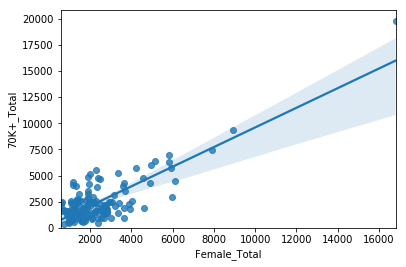

In [110]:
# Relationship between females and income
sns.regplot(x="Female_Total", y="70K+_Total", data=toronto)
plt.ylim(0,)

In [111]:
toronto[["Female_Total", "70K+_Total"]].corr()

Female_Total  70K+_Total
Female_Total      1.000000    0.813617
70K+_Total        0.813617    1.000000

#### Relationship between Females and Education

(0, 38682.73709718853)

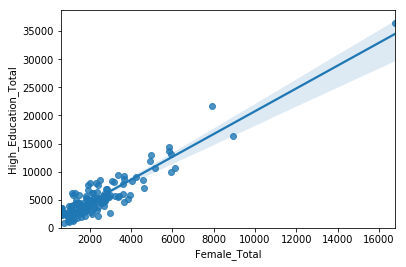

In [112]:
# Relationship between females and education
sns.regplot(x="Female_Total", y="High_Education_Total", data=toronto)
plt.ylim(0,)

In [113]:
toronto[["Female_Total", "High_Education_Total"]].corr()

Female_Total  High_Education_Total
Female_Total               1.00000               0.92554
High_Education_Total       0.92554               1.00000

#### Relationship between Education and Income

(0, 20806.712131529566)

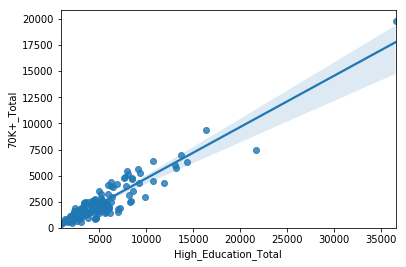

In [114]:
# Relationship between Education and Income
sns.regplot(x="High_Education_Total", y="70K+_Total", data=toronto)
plt.ylim(0,)

In [115]:
toronto[["High_Education_Total", "70K+_Total"]].corr()

High_Education_Total  70K+_Total
High_Education_Total              1.000000    0.931231
70K+_Total                        0.931231    1.000000

### All Features seem to be posively correlated to each other. This dataset seems to be a good fit with the typical vegetarian profile.

### 3.1.2 Descriptive Statistical Analysis

### Describing the dataset

In [116]:
toronto.describe(include='all')

AREA_SHORT_CODE             Neighborhood   Longitude    Latitude  \
count          140.0000                      140  140.000000  140.000000   
unique              NaN                      140         NaN         NaN   
top                 NaN  Don Valley Village (47)         NaN         NaN   
freq                NaN                        1         NaN         NaN   
mean            70.5000                      NaN  -79.400186   43.708841   
std             40.5586                      NaN    0.102044    0.051274   
min              1.0000                      NaN  -79.596356   43.592362   
25%             35.7500                      NaN  -79.479794   43.671009   
50%             70.5000                      NaN  -79.403989   43.702021   
75%            105.2500                      NaN  -79.331097   43.747294   
max            140.0000                      NaN  -79.150843   43.821201   

        Female_Total    70K+_Total  High_Education_Total  
count     140.000000    140.000000            140.000000  
unique           NaN           NaN                   NaN  
top              NaN           NaN                   NaN  
freq             NaN           NaN                   NaN  
mean     2406.857143   2470.571429           5353.964286  
std      1877.853545   2167.774701           4113.422077  
min       585.000000    355.000000            880.000000  
25%      1308.750000   1348.750000           2980.000000  
50%      1952.500000   1900.000000           4502.500000  
75%      2773.750000   2662.500000           6058.750000  
max     16805.000000  19820.000000          36525.000000

## What's the median here?

In [117]:
toronto.median(axis = 0) 

AREA_SHORT_CODE           70.500000
Longitude                -79.403989
Latitude                  43.702021
Female_Total            1952.500000
70K+_Total              1900.000000
High_Education_Total    4502.500000
dtype: float64

## Calculation percentages of these features

### Toronto Population = 2 731 571      

In [118]:
Torontopop = 2731571
Total_Female = toronto['Female_Total'].sum()

In [119]:
print(Total_Female * 100 / Torontopop )

12.33575843351683


 
### Females between 25 and 39 years old forms 12.3% of Toronto's total population ( Females= 336 960)

In [120]:
incometot = toronto['70K+_Total'].sum()

In [121]:
print(incometot * 100 / Torontopop )

12.662310443330963


### App. 12.7% of population earns $70,000.00 or more in a year

In [122]:
edtot = combined_df['High_Education_Total'].sum()

### App. 27.4% of population are very well educated

In [123]:
print(edtot * 100 / Torontopop )

27.440436291057416


### In sum, based on the demographic information there is a good market window in Toronto for a new vegetarian restaurant 

### Let's do some sorting and concatenating between features to get the top of them all

### Sorting Females to get the top 40

In [124]:
df_f=toronto.sort_values("Female_Total", axis = 0, ascending = False) 
                 

In [125]:
df_f=df_f.head(40)

### Sorting Income to get the top 40

In [126]:
df_i=toronto.sort_values("70K+_Total", axis = 0, ascending = False) 

In [127]:
df_i=df_i.head(40)

### Sorting Education to get the top 40

In [128]:
df_e=combined_df.sort_values("High_Education_Total", axis = 0, ascending = False) 



In [129]:
df_e=df_e.head(40)

### Adding the results in the same dataframe, sorting and keeping only duplicates (one row per each)

In [130]:
df10 = df_f.append(df_i)

In [131]:
df10 = df10.append(df_e)

C:\Users\sirpa\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [132]:
df10.shape

(120, 7)

In [133]:
df11=df10.sort_values("AREA_SHORT_CODE", axis = 0, ascending = False) 




In [134]:
#df12=df11.drop_duplicates() 
df12=df11[df11.duplicated(keep=False)]

In [135]:
df13=df12.drop_duplicates() 

In [136]:
df13.shape

(19, 7)

In [137]:
final=df13.sort_values("Female_Total", axis = 0, ascending = False) 

### Here is the result of the top 15 where the rows that have all the best numbers per each features are combined and sorted by the most important feature (Female)

In [214]:
top15=final.head(15)

In [215]:
top15

70K+_Total  AREA_SHORT_CODE  Female_Total  High_Education_Total  \
61        19820               77         16805                 36525   
26         9395               82          8920                 16370   
68         7450               51          7915                 21670   
106        4470               93          6105                 10655   
71         2960              137          5955                  9890   
22         5715              104          5910                 13190   
97         6280               75          5845                 14360   
132        7005               14          5845                 13665   
16         6385               17          5150                 10720   
77         6010               95          4980                 13005   
80         4325               76          4910                 11830   
44         4730              131          4580                  8435   
49         5680               70          4225                  9065   
139        2605              117          4040                  8315   
34         3570               45          3675                  8625   

      Latitude  Longitude                              Neighborhood  
61   43.633880 -79.377202    Waterfront Communities-The Island (77)  
26   43.636681 -79.412420                              Niagara (82)  
68   43.770602 -79.401484                      Willowdale East (51)  
106  43.665677 -79.438541  Dovercourt-Wallace Emerson-Junction (93)  
71   43.766740 -79.228586                              Woburn (137)  
22   43.704435 -79.393360                 Mount Pleasant West (104)  
97   43.659649 -79.379017                Church-Yonge Corridor (75)  
132  43.633463 -79.543317           Islington-City Centre West (14)  
16   43.615924 -79.500137  Mimico (includes Humber Bay Shores) (17)  
77   43.671585 -79.404001                                Annex (95)  
80   43.657511 -79.385721                  Bay Street Corridor (76)  
44   43.821201 -79.186343                               Rouge (131)  
49   43.649292 -79.335651                      South Riverdale (70)  
139  43.795716 -79.314084                          L'Amoreaux (117)  
34   43.755033 -79.330180                    Parkwoods-Donalda (45)

### Let's plot the Top 15 locations

In [216]:
# Setting the positions and width for the bars
top =top15
pos = list(range(len(top['Female_Total']))) 
width = 0.28
pos

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [217]:
top=top.set_index('Neighborhood')

listOfRowIndexLabels = list(top.index.values)
listOfRowIndexLabels[0]

'Waterfront Communities-The Island (77)'

In [218]:
top=top.rename(columns={'Female_Total': 'Females','70K+_Total': 'Income','High_Education_Total': 'Education' })

top.head(1)

Income  AREA_SHORT_CODE  Females  \
Neighborhood                                                               
Waterfront Communities-The Island (77)   19820               77    16805   

                                        Education  Latitude  Longitude  
Neighborhood                                                            
Waterfront Communities-The Island (77)      36525  43.63388 -79.377202

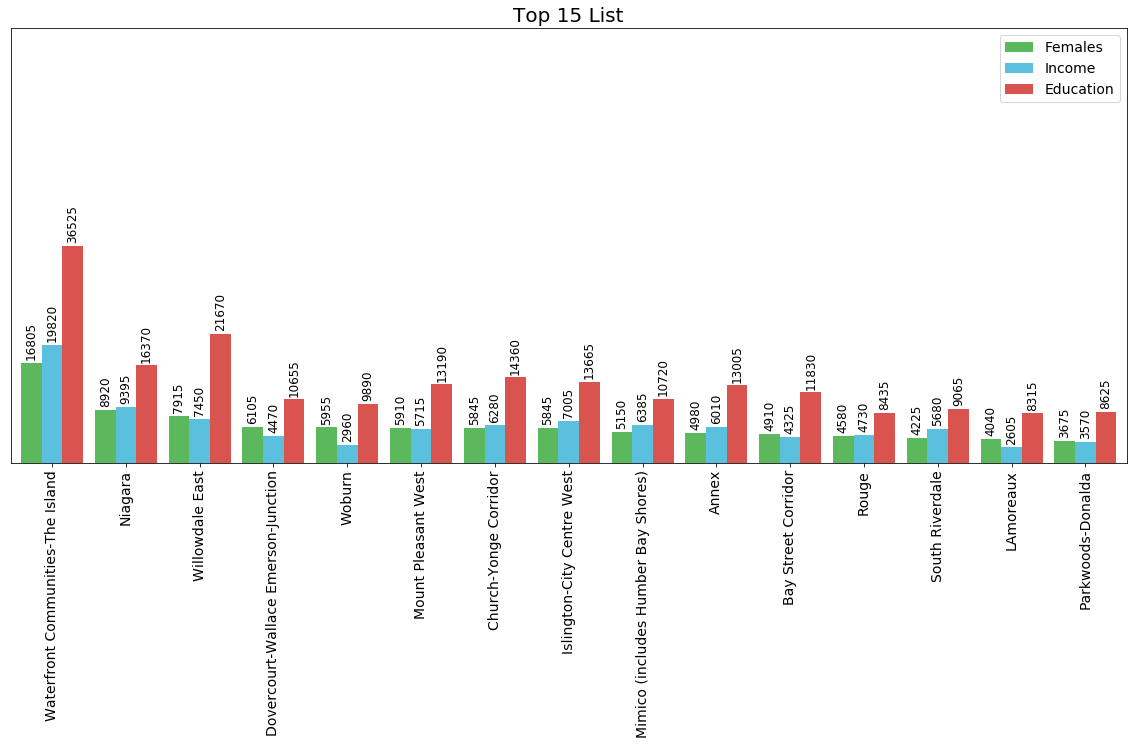

In [219]:
# Plotting the bars
fig, ax = plt.subplots(figsize=(20,8))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        top['Females'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=1, 
        # with color
        color='#5cb85c', 
        # with label the first value in first_name
        label=listOfRowIndexLabels[3]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        top['Income'],
        # of width
        width, 
        # with alpha 0.5
        alpha=1, 
        # with color
        color='#5bc0de', 
        # with label the second value in first_name
        label=listOfRowIndexLabels[1]) 

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
        top['Education'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=1, 
        # with color
        color='#d9534f', 
        # with label the third value in first_name
        label=listOfRowIndexLabels[4]) 

# Hide the y axis label

ax.set_yticklabels([])


plt.xticks(fontsize=14)

plt.yticks([])

ax.spines['bottom'].set_visible(True)

# Set the position of the x ticks
ax.set_xticks([p + 1 * width for p in pos])

plt.xticks(rotation='vertical')
           
          

# Set the labels for the x ticks
ax.set_xticklabels(['Waterfront Communities-The Island',
 'Niagara',
 'Willowdale East',
 'Dovercourt-Wallace Emerson-Junction',
 'Woburn',
 'Mount Pleasant West',
 'Church-Yonge Corridor', 
 'Islington-City Centre West',
 'Mimico (includes Humber Bay Shores)',
 'Annex',
 'Bay Street Corridor',
 'Rouge',
 'South Riverdale',
 'LAmoreaux',
 'Parkwoods-Donalda'])



# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*3)
plt.ylim([0, max(top['Females'] + top['Income'] + top['Education'])] )

# Adding the legend and showing the plot
plt.legend(['Females', 'Income', 'Education'], loc='upper right', fontsize=14)

plt.title("Top 15 List",fontsize= 20)

plt.xticks(fontsize=14)


# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:}'.format(height), (p.get_x()+.5*width, p.get_y() + height + 1), xytext=(0, 3), textcoords="offset points",
                   ha='center', va='bottom', rotation='vertical', fontsize=12)
    
    

    
    
plt.show()

### Using geopy library to get the latitude and longitude values of Toronto

In [220]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


### Creating a map of Toronto with neighborhoods superimposed on top

In [221]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(toronto['Latitude'], toronto['Longitude'],toronto['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Defining Foursquare Credentials and Version

In [222]:
CLIENT_ID = '4H0YB13OQY4VY2L12NWC5SGUTLWBQOMUNNGFW45XPMCKEAB0' # your Foursquare ID
CLIENT_SECRET = '4KDXXHI03KW4NIXQPEEQ4JUJOA0EBUM2FOUXETSTKKSIM2W5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4H0YB13OQY4VY2L12NWC5SGUTLWBQOMUNNGFW45XPMCKEAB0
CLIENT_SECRET:4KDXXHI03KW4NIXQPEEQ4JUJOA0EBUM2FOUXETSTKKSIM2W5


### Let's explore the first neighborhood in the dataframe.

In [223]:
toronto.loc[0, 'Neighborhood']

'Wychwood (94)'

In [224]:
neighborhood_latitude = toronto.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Wychwood (94) are 43.6769192679, -79.425514947.


In [225]:
# type your answer here
LIMIT = 300 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=4H0YB13OQY4VY2L12NWC5SGUTLWBQOMUNNGFW45XPMCKEAB0&client_secret=4KDXXHI03KW4NIXQPEEQ4JUJOA0EBUM2FOUXETSTKKSIM2W5&v=20180605&ll=43.6769192679,-79.425514947&radius=1000&limit=300'

In [226]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e5d0ff40be7b4001bd03c25'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bracondale Hill',
  'headerFullLocation': 'Bracondale Hill, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 88,
  'suggestedBounds': {'ne': {'lat': 43.68591927690001,
    'lng': -79.4130942596793},
   'sw': {'lat': 43.667919258899985, 'lng': -79.4379356343207}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4afc6ed3f964a520a82222e3',
       'name': 'Wychwood Barns',
       'location': {'address': '601 Christie St.',
        'crossStreet': 'at Christie',
        'lat': 43.68002809008845,
        'lng': -79.42380960285216,
        'labeledLatLn

### Let's extract the category of the venue

In [227]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Let's clean the json and structure it into a pandas dataframe.

In [228]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

name                 categories        lat  \
0                    Wychwood Barns                Event Space  43.680028   
1    Wychwood Barns Farmers' Market             Farmers Market  43.680010   
2                  Pukka Restaurant          Indian Restaurant  43.681055   
3                    The Stockyards                  BBQ Joint  43.681570   
4                    Hillcrest Park                       Park  43.676012   
5                        CocoaLatte                       Café  43.681768   
6                    Ferro Bar Cafe         Italian Restaurant  43.681080   
7                   Baker and Scone                       Café  43.681614   
8                           Bar Ape             Ice Cream Shop  43.681570   
9                         Mi Tierra  South American Restaurant  43.680618   
10                          The Gem                        Bar  43.674585   
11                      Contra Cafe                       Café  43.669107   
12           Churrasco of St. Clair      Portuguese Restaurant  43.681681   
13                           Booyah             Ice Cream Shop  43.681744   
14             Dave's… On St. Clair                        Bar  43.681449   
15                     Dutch Dreams             Ice Cream Shop  43.682182   
16                  Craque De Creme               Dessert Shop  43.679846   
17                   Vinny’s Panini         Italian Restaurant  43.670679   
18                       Pain Perdu        American Restaurant  43.681407   
19                     Krave Coffee                Coffee Shop  43.680740   
20                        Starbucks                Coffee Shop  43.671530   
21                  Universal Grill                      Diner  43.670550   
22              Asada Mexican Grill         Mexican Restaurant  43.680634   
23            Savera Indian Cuisine          Indian Restaurant  43.680578   
24                      Cho Cho Cho         Chinese Restaurant  43.680139   
25                           Spynga                Yoga Studio  43.681405   
26    Evergreen Natural Health Food          Food & Drink Shop  43.682965   
27                        Menchie's         Frozen Yogurt Shop  43.683116   
28                             Aviv          Jewish Restaurant  43.680786   
29                             NODO         Italian Restaurant  43.681156   
30                      Faema Caffe                       Café  43.671046   
31                      The Rushton                 Restaurant  43.681386   
32                           Leah's                     Bakery  43.682053   
33                      Moong Sushi           Sushi Restaurant  43.682545   
34                        Starbucks                Coffee Shop  43.683972   
35                Vive Fitness 24-7                        Gym  43.672645   
36                   Canvas Gallery                Art Gallery  43.669796   
37              Taste of Thai House            Thai Restaurant  43.682735   
38                 South St. Burger               Burger Joint  43.681229   
39     Albert's Real Jamaican Foods       Caribbean Restaurant  43.683061   
40                  TD Canada Trust                       Bank  43.680525   
41                          Loblaws              Grocery Store  43.671657   
42               Vannis Bar & Grill         Italian Restaurant  43.681822   
43               Shoppers Drug Mart                   Pharmacy  43.682630   
44                Stubbe Chocolates                Candy Store  43.671566   
45         Sea Witch Fish and Chips          Fish & Chips Shop  43.682112   
46                  The Piper's Pub                 Restaurant  43.681031   
47                   Lasa by Lamesa        Filipino Restaurant  43.682196   
48                             LCBO               Liquor Store  43.680210   
49                    Eastern Twist          Indian Restaurant  43.683092   
50                   Pizza Del Arte                Pizza Place  43.683516   
51                      Piz

### Let's find out how many venues were returned by Foursquare

In [229]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

88 venues were returned by Foursquare.


### Let's explore all Toronto neighbourhoods

In [230]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [231]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Let's create a new dataframe called toronto_venues

In [232]:
toronto_venues = getNearbyVenues(names= toronto['Neighborhood'],
                                   latitudes=toronto['Latitude'],
                                   longitudes=toronto['Longitude']
                                  )

Wychwood (94)
Yonge-Eglinton (100)
Yonge-St.Clair (97)
York University Heights (27)
Yorkdale-Glen Park (31)
Lambton Baby Point (114)
Lansing-Westgate (38)
Lawrence Park North (105)
Lawrence Park South (103)
Leaside-Bennington (56)
Little Portugal (84)
Long Branch (19)
Malvern (132)
Maple Leaf (29)
Markland Wood (12)
Milliken (130)
Mimico (includes Humber Bay Shores) (17)
Morningside (135)
Moss Park (73)
Mount Dennis (115)
Mount Olive-Silverstone-Jamestown (2)
Mount Pleasant East (99)
Mount Pleasant West (104)
New Toronto (18)
Newtonbrook East (50)
Newtonbrook West (36)
Niagara (82)
North Riverdale (68)
North St.James Town (74)
O'Connor-Parkview (54)
Oakridge (121)
Oakwood Village (107)
Old East York (58)
Palmerston-Little Italy (80)
Parkwoods-Donalda (45)
Pelmo Park-Humberlea (23)
Playter Estates-Danforth (67)
Pleasant View (46)
Princess-Rosethorn (10)
Regent Park (72)
Rexdale-Kipling (4)
Rockcliffe-Smythe (111)
Roncesvalles (86)
Rosedale-Moore Park (98)
Rouge (131)
Runnymede-Bloor Wes

### Let's check the size of the resulting dataframe

In [233]:
print(toronto_venues.shape)
toronto_venues.head()

(2102, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         Wychwood (94)              43.676919              -79.425515   
1         Wychwood (94)              43.676919              -79.425515   
2         Wychwood (94)              43.676919              -79.425515   
3         Wychwood (94)              43.676919              -79.425515   
4  Yonge-Eglinton (100)              43.704689              -79.403590   

                                     Venue  Venue Latitude  Venue Longitude  \
0                           Wychwood Barns       43.680028       -79.423810   
1           Wychwood Barns Farmers' Market       43.680010       -79.423849   
2                           Hillcrest Park       43.676012       -79.424787   
3                      Annabelle Pasta Bar       43.675445       -79.423341   
4  North Toronto Memorial Community Centre       43.706098       -79.404337   

       Venue Category  
0         Event Space  
1      Farmers Market  
2                Park  
3  Italian Restaurant  
4                 Gym

### Let's check how many venues were returned for each neighborhood

In [234]:
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                      
Agincourt North (129)                                        17   
Agincourt South-Malvern West (128)                           19   
Alderwood (20)                                                5   
Annex (95)                                                   27   
Banbury-Don Mills (42)                                       20   
Bathurst Manor (34)                                           4   
Bay Street Corridor (76)                                     89   
Bayview Village (52)                                          5   
Bayview Woods-Steeles (49)                                    3   
Bedford Park-Nortown (39)                                    26   
Beechborough-Greenbrook (112)                                 2   
Bendale (127)                                                 4   
Birchcliffe-Cliffside (122)                                   4   
Black Creek (24)                                              5   
Blake-Jones (69)                                             17   
Briar Hill-Belgravia (108)                                   11   
Bridle Path-Sunnybrook-York Mills (41)                        8   
Broadview North (57)                                          3   
Brookhaven-Amesbury (30)                                      1   
Cabbagetown-South St.James Town (71)                         44   
Caledonia-Fairbank (109)                                      3   
Casa Loma (96)                                               14   
Centennial Scarborough (133)                                  3   
Church-Yonge Corridor (75)                                  100   
Clairlea-Birchmount (120)                                    10   
Clanton Park (33)                                             3   
Cliffcrest (123)                                              6   
Corso Italia-Davenport (92)                                  20   
Danforth (66)                                                32   
Danforth East York (59)                                       6   
Don Valley Village (47)                                      10   
Dorset Park (126)                                             8   
Dovercourt-Wallace Emerson-Junction (93)                     16   
Downsview-Roding-CFB (26)                                     3   
Dufferin Grove (83)                                          67   
East End-Danforth (62)                                       16   
Edenbridge-Humber Valley (9)                                  3   
Eglinton East (138)                                           5   
Elms-Old Rexdale (5)                                          5   
Englemount-Lawrence (32)                                      8   
Eringate-Centennial-West Deane (11)                           6   
Etobicoke West Mall (13)                                      4   
Flemingdon Park (44)                                         14   
Forest Hill North (102)                                      20   
Forest Hill South (101)                                       2   
Glenfield-Jane Heights (25)                                   4   
Greenwood-Coxwell (65)                                       40   
Guildwood (140)                                               6   
Henry Farm (53)                                               6   
High Park North (88)                                         10   
High Park-Swansea (87)                                       14   
Highland Creek (134)                                          4   
Hillcrest Village (48)                                        2   
Humber Heights-Westmount (8)                                  3   
Humber Summit (21)                                            1   
Humbermede (22)                                               3   
Humewood-Cedarvale (106)                                      7   
Ionview (125)                                                 6   
Islington-City Centre 

### Let's find out how many unique categories can be curated from all the returned venues

In [235]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 279 uniques categories.


In [236]:
venue_categories = toronto_venues['Venue Category'].value_counts()

### Let's analyze each neighborhood in Toronto

In [237]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

Zoo Exhibit  Accessories Store  African Restaurant  American Restaurant  \
0            0                  0                   0                    0   
1            0                  0                   0                    0   
2            0                  0                   0                    0   
3            0                  0                   0                    0   
4            0                  0                   0                    0   

   Amphitheater  Animal Shelter  Antique Shop  Arcade  Argentinian Restaurant  \
0             0               0             0       0                       0   
1             0               0             0       0                       0   
2             0               0             0       0                       0   
3             0               0             0       0                       0   
4             0               0             0       0                       0   

   Art Gallery  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0            0                    0                 0                   0   
1            0                    0                 0                   0   
2            0                    0                 0                   0   
3            0                    0                 0                   0   
4            0                    0                 0                   0   

   Auto Dealership  Auto Garage  BBQ Joint  Baby Store  Bagel Shop  Bakery  \
0                0            0          0           0           0       0   
1                0            0          0           0           0       0   
2                0            0          0           0           0       0   
3                0            0          0           0           0       0   
4                0            0          0           0           0       0   

   Bank  Bar  Baseball Field  Basketball Court  Beach  Beer Bar  Beer Store  \
0     0    0               0                 0      0         0           0   
1     0    0               0                 0      0         0           0   
2     0    0               0                 0      0         0           0   
3     0    0               0                 0      0         0           0   
4     0    0               0                 0      0         0           0   

   Belgian Restaurant  Bike Rental / Bike Share  Bike Shop  Bistro  \
0                   0                         0          0       0   
1                   0                         0          0       0   
2                   0                         0          0       0   
3                   0                         0          0       0   
4                   0                         0          0       0   

   Boat or Ferry  Bookstore  Boutique  Bowling Alley  Brazilian Restaurant  \
0              0          0         0              0                     0   
1              0          0         0              0                     0   
2              0          0         0              0                     0   
3              0          0         0              0                     0   
4              0          0         0              0                     0   

   Breakfast Spot  Brewery  Bridal Shop  Bubble Tea Shop  Buffet  Building  \
0               0        0            0                0       0         0   
1               0        0            0                0       0         0   
2               0        0            0                0       0         0   
3               0        0            0                0       0         0   
4               0        0            0                0       0         0   

   Burger Joint  Burrito Place  Bus Line  Bus Station  Bus Stop  \
0             0              0         0            0         0   
1             0              0         0            0         0   
2             0              0         0            0         0   
3            

In [238]:
toronto_onehot.shape

(2102, 279)

### Let's see where are Vegetarian / Vegan Restaurants in Toronto

In [239]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').sum().reset_index()
toronto_grouped

Neighborhood  Zoo Exhibit  Accessories Store  \
0                       Agincourt North (129)            0                  0   
1          Agincourt South-Malvern West (128)            0                  0   
2                              Alderwood (20)            0                  0   
3                                  Annex (95)            0                  0   
4                      Banbury-Don Mills (42)            0                  0   
5                         Bathurst Manor (34)            0                  0   
6                    Bay Street Corridor (76)            0                  0   
7                        Bayview Village (52)            0                  0   
8                  Bayview Woods-Steeles (49)            0                  0   
9                   Bedford Park-Nortown (39)            0                  0   
10              Beechborough-Greenbrook (112)            0                  0   
11                              Bendale (127)            0                  0   
12                Birchcliffe-Cliffside (122)            0                  0   
13                           Black Creek (24)            0                  0   
14                           Blake-Jones (69)            0                  0   
15                 Briar Hill-Belgravia (108)            0                  0   
16     Bridle Path-Sunnybrook-York Mills (41)            0                  0   
17                       Broadview North (57)            0                  0   
18                   Brookhaven-Amesbury (30)            0                  0   
19       Cabbagetown-South St.James Town (71)            0                  0   
20                   Caledonia-Fairbank (109)            0                  0   
21                             Casa Loma (96)            0                  0   
22               Centennial Scarborough (133)            0                  0   
23                 Church-Yonge Corridor (75)            0                  0   
24                  Clairlea-Birchmount (120)            0                  0   
25                          Clanton Park (33)            0                  0   
26                           Cliffcrest (123)            0                  0   
27                Corso Italia-Davenport (92)            0                  0   
28                              Danforth (66)            0                  0   
29                    Danforth East York (59)            0                  0   
30                    Don Valley Village (47)            0                  0   
31                          Dorset Park (126)            0                  0   
32   Dovercourt-Wallace Emerson-Junction (93)            0                  0   
33                  Downsview-Roding-CFB (26)            0                  0   
34                        Dufferin Grove (83)            0                  1   
35                     East End-Danforth (62)            0                  0   
36               Edenbridge-Humber Valley (9)            0                  0   
37                        Eglinton East (138)            0                  0   
38                       Elms-Old Rexdale (5)            0                  0   
39                   Englemount-Lawrence (32)            0                  0   
40        Eringate-Centennial-West Deane (11)            0                  0   
41                   Etobicoke West Mall (13)            0                  0   
42                       Flemingdon Park (44)            0                  0   
43                    Forest Hill North (102)            0                  0   
44                    Forest Hill South (101)            0                  0   
45                Glenfield-Jane Heights (25)            0                  0   
46                     Greenwood-Coxwell (65)            0                  0   
47                            Guildwood (140)            0                  0   
48                            Henry Farm (53)            0      

In [240]:
toronto_area = toronto_grouped[['Neighborhood', 'Vegetarian / Vegan Restaurant']]
toronto_area

Neighborhood  Vegetarian / Vegan Restaurant
0                       Agincourt North (129)                              0
1          Agincourt South-Malvern West (128)                              0
2                              Alderwood (20)                              0
3                                  Annex (95)                              1
4                      Banbury-Don Mills (42)                              0
5                         Bathurst Manor (34)                              0
6                    Bay Street Corridor (76)                              0
7                        Bayview Village (52)                              0
8                  Bayview Woods-Steeles (49)                              0
9                   Bedford Park-Nortown (39)                              0
10              Beechborough-Greenbrook (112)                              0
11                              Bendale (127)                              0
12                Birchcliffe-Cliffside (122)                              0
13                           Black Creek (24)                              0
14                           Blake-Jones (69)                              0
15                 Briar Hill-Belgravia (108)                              0
16     Bridle Path-Sunnybrook-York Mills (41)                              0
17                       Broadview North (57)                              0
18                   Brookhaven-Amesbury (30)                              0
19       Cabbagetown-South St.James Town (71)                              0
20                   Caledonia-Fairbank (109)                              0
21                             Casa Loma (96)                              0
22               Centennial Scarborough (133)                              0
23                 Church-Yonge Corridor (75)                              0
24                  Clairlea-Birchmount (120)                              0
25                          Clanton Park (33)                              0
26                           Cliffcrest (123)                              0
27                Corso Italia-Davenport (92)                              0
28                              Danforth (66)                              0
29                    Danforth East York (59)                              0
30                    Don Valley Village (47)                              0
31                          Dorset Park (126)                              0
32   Dovercourt-Wallace Emerson-Junction (93)                              0
33                  Downsview-Roding-CFB (26)                              0
34                        Dufferin Grove (83)                              0
35                     East End-Danforth (62)                              0
36               Edenbridge-Humber Valley (9)                              0
37                        Eglinton East (138)                              0
38                       Elms-Old Rexdale (5)                              0
39                   Englemount-Lawrence (32)                              0
40        Eringate-Centennial-West Deane (11)                              0
41                   Etobicoke West Mall (13)                              0
42                       Flemingdon Park (44)                              0
43                    Forest Hill North (102)                              0
44                    Forest Hill South (101)                              0
45                Glenfield-Jane Heights (25)                              0
46                     Greenwood-Coxwell (65)                              0
47                            Guildwood (140)                              0
48                            Henry Farm (53)                              0
49                       High Park North (88)                              0
50                     High Park-Swansea (87)                              0
51                       High

In [241]:
toronto_area = toronto_area.loc[toronto_area['Vegetarian / Vegan Restaurant'] != 0]
toronto_area


Neighborhood  Vegetarian / Vegan Restaurant
3                     Annex (95)                              1
62     Kensington-Chinatown (78)                              3
71          Little Portugal (84)                              1
83     Mount Pleasant West (104)                              1
93  Palmerston-Little Italy (80)                              1

In [242]:
vegplaces=toronto_area
vegplaces=pd.merge(vegplaces,toronto,on='Neighborhood')

In [243]:
vegplaces

Neighborhood  Vegetarian / Vegan Restaurant  \
0                    Annex (95)                              1   
1     Kensington-Chinatown (78)                              3   
2          Little Portugal (84)                              1   
3     Mount Pleasant West (104)                              1   
4  Palmerston-Little Italy (80)                              1   

   AREA_SHORT_CODE  Longitude   Latitude  Female_Total  70K+_Total  \
0               95 -79.404001  43.671585          4980        6010   
1               78 -79.397240  43.653554          2850        1825   
2               84 -79.430323  43.647536          3415        2405   
3              104 -79.393360  43.704435          5910        5715   
4               80 -79.418409  43.659157          2800        2195   

   High_Education_Total  
0                 13005  
1                  5345  
2                  5585  
3                 13190  
4                  5545

In [244]:
both=pd.merge(vegplaces, top15, on='AREA_SHORT_CODE', how='inner')

In [245]:
both

Neighborhood_x  Vegetarian / Vegan Restaurant  AREA_SHORT_CODE  \
0                 Annex (95)                              1               95   
1  Mount Pleasant West (104)                              1              104   

   Longitude_x  Latitude_x  Female_Total_x  70K+_Total_x  \
0   -79.404001   43.671585            4980          6010   
1   -79.393360   43.704435            5910          5715   

   High_Education_Total_x  70K+_Total_y  Female_Total_y  \
0                   13005          6010            4980   
1                   13190          5715            5910   

   High_Education_Total_y  Latitude_y  Longitude_y             Neighborhood_y  
0                   13005   43.671585   -79.404001                 Annex (95)  
1                   13190   43.704435   -79.393360  Mount Pleasant West (104)

In [246]:
# create map of Toronto using latitude and longitude values
map_vegvspot = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(top15['Latitude'], top15['Longitude'],top15['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_vegvspot)
    
for lat, lng, neighborhood in zip(vegplaces['Latitude'], vegplaces['Longitude'],vegplaces['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='green',
            fill=True,
            fill_color='#32CD32',
            fill_opacity=0.7,
            parse_html=False).add_to(map_vegvspot)
    
for lat, lng, neighborhood in zip(both['Latitude_x'], both['Longitude_x'],both['Neighborhood_x']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='#FF4500',
            fill_opacity=0.7,
            parse_html=False).add_to(map_vegvspot)
       
map_vegvspot

## 3.2. Machine Learning

### 3.2.1 Finding the Best k using an Elbow Method

In [251]:
toronto_grouped2 = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped2

Neighborhood  Zoo Exhibit  Accessories Store  \
0                       Agincourt North (129)     0.000000           0.000000   
1          Agincourt South-Malvern West (128)     0.000000           0.000000   
2                              Alderwood (20)     0.000000           0.000000   
3                                  Annex (95)     0.000000           0.000000   
4                      Banbury-Don Mills (42)     0.000000           0.000000   
5                         Bathurst Manor (34)     0.000000           0.000000   
6                    Bay Street Corridor (76)     0.000000           0.000000   
7                        Bayview Village (52)     0.000000           0.000000   
8                  Bayview Woods-Steeles (49)     0.000000           0.000000   
9                   Bedford Park-Nortown (39)     0.000000           0.000000   
10              Beechborough-Greenbrook (112)     0.000000           0.000000   
11                              Bendale (127)     0.000000           0.000000   
12                Birchcliffe-Cliffside (122)     0.000000           0.000000   
13                           Black Creek (24)     0.000000           0.000000   
14                           Blake-Jones (69)     0.000000           0.000000   
15                 Briar Hill-Belgravia (108)     0.000000           0.000000   
16     Bridle Path-Sunnybrook-York Mills (41)     0.000000           0.000000   
17                       Broadview North (57)     0.000000           0.000000   
18                   Brookhaven-Amesbury (30)     0.000000           0.000000   
19       Cabbagetown-South St.James Town (71)     0.000000           0.000000   
20                   Caledonia-Fairbank (109)     0.000000           0.000000   
21                             Casa Loma (96)     0.000000           0.000000   
22               Centennial Scarborough (133)     0.000000           0.000000   
23                 Church-Yonge Corridor (75)     0.000000           0.000000   
24                  Clairlea-Birchmount (120)     0.000000           0.000000   
25                          Clanton Park (33)     0.000000           0.000000   
26                           Cliffcrest (123)     0.000000           0.000000   
27                Corso Italia-Davenport (92)     0.000000           0.000000   
28                              Danforth (66)     0.000000           0.000000   
29                    Danforth East York (59)     0.000000           0.000000   
30                    Don Valley Village (47)     0.000000           0.000000   
31                          Dorset Park (126)     0.000000           0.000000   
32   Dovercourt-Wallace Emerson-Junction (93)     0.000000           0.000000   
33                  Downsview-Roding-CFB (26)     0.000000           0.000000   
34                        Dufferin Grove (83)     0.000000           0.014925   
35                     East End-Danforth (62)     0.000000           0.000000   
36               Edenbridge-Humber Valley (9)     0.000000           0.000000   
37                        Eglinton East (138)     0.000000           0.000000   
38                       Elms-Old Rexdale (5)     0.000000           0.000000   
39                   Englemount-Lawrence (32)     0.000000           0.000000   
40        Eringate-Centennial-West Deane (11)     0.000000           0.000000   
41                   Etobicoke West Mall (13)     0.000000           0.000000   
42                       Flemingdon Park (44)     0.000000           0.000000   
43                    Forest Hill North (102)     0.000000           0.000000   
44                    Forest Hill South (101)     0.000000           0.000000   
45                Glenfield-Jane Heights (25)     0.000000           0.000000   
46                     Greenwood-Coxwell (65)     0.000000           0.000000   
47                            Guildwood (140)     0.000000           0.000000   
48                            Henry Farm (53)     0.000000      

In [252]:
toronto_grouped2.shape

(137, 279)

### Let's find the best cluster size k using Elbow method

In [253]:
x = toronto_grouped2.iloc[:,1:280]
x.head()

Zoo Exhibit  Accessories Store  African Restaurant  American Restaurant  \
0          0.0                0.0                 0.0             0.000000   
1          0.0                0.0                 0.0             0.052632   
2          0.0                0.0                 0.0             0.000000   
3          0.0                0.0                 0.0             0.037037   
4          0.0                0.0                 0.0             0.000000   

   Amphitheater  Animal Shelter  Antique Shop  Arcade  Argentinian Restaurant  \
0           0.0             0.0           0.0     0.0                     0.0   
1           0.0             0.0           0.0     0.0                     0.0   
2           0.0             0.0           0.0     0.0                     0.0   
3           0.0             0.0           0.0     0.0                     0.0   
4           0.0             0.0           0.0     0.0                     0.0   

   Art Gallery  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0          0.0                  0.0          0.000000                 0.0   
1          0.0                  0.0          0.052632                 0.0   
2          0.0                  0.0          0.000000                 0.0   
3          0.0                  0.0          0.000000                 0.0   
4          0.0                  0.0          0.000000                 0.0   

   Auto Dealership  Auto Garage  BBQ Joint  Baby Store  Bagel Shop    Bakery  \
0              0.0          0.0   0.000000         0.0         0.0  0.058824   
1              0.0          0.0   0.000000         0.0         0.0  0.000000   
2              0.0          0.0   0.000000         0.0         0.0  0.000000   
3              0.0          0.0   0.037037         0.0         0.0  0.000000   
4              0.0          0.0   0.000000         0.0         0.0  0.000000   

       Bank  Bar  Baseball Field  Basketball Court  Beach  Beer Bar  \
0  0.000000  0.0             0.0               0.0    0.0       0.0   
1  0.052632  0.0             0.0               0.0    0.0       0.0   
2  0.000000  0.0             0.0               0.0    0.0       0.0   
3  0.000000  0.0             0.0               0.0    0.0       0.0   
4  0.000000  0.0             0.0               0.0    0.0       0.0   

   Beer Store  Belgian Restaurant  Bike Rental / Bike Share  Bike Shop  \
0    0.058824                 0.0                       0.0        0.0   
1    0.000000                 0.0                       0.0        0.0   
2    0.000000                 0.0                       0.0        0.0   
3    0.000000                 0.0                       0.0        0.0   
4    0.000000                 0.0                       0.0        0.0   

   Bistro  Boat or Ferry  Bookstore  Boutique  Bowling Alley  \
0     0.0            0.0        0.0       0.0            0.0   
1     0.0            0.0        0.0       0.0            0.0   
2     0.0            0.0        0.0       0.0            0.0   
3     0.0            0.0        0.0       0.0            0.0   
4     0.0            0.0        0.0       0.0            0.0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                   0.0             0.0      0.0          0.0   
1                   0.0             0.0      0.0          0.0   
2                   0.0             0.0      0.0          0.0   
3                   0.0             0.0      0.0          0.0   
4                   0.0             0.0      0.0          0.0   

   Bubble Tea Shop  Buffet  Building  Burger Joint  Burrito Place  Bus Line  \
0              0.0     0.0       0.0      0.000000            0.0       0.0   
1              0.0     0.0       0.0      0.000000            0.0       0.0   
2              0.0     0.0       0.0      0.000000            0.0       0.0   
3              0.0     0.0       0.0      0.037037            0.0       0.0   
4              0.0     0.0       0.0      0.000000          

In [255]:
kmeans = KMeans(4)

In [257]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [258]:
kmeans.inertia_

21.50475499104079

In [261]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for.
# Note that 'range' doesn't include the upper boundery
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[27.838265449511695,
 23.862829073375238,
 22.63586165704471,
 21.77968567192061,
 20.872110980836588,
 19.779489580109747,
 18.91963523913935,
 18.408293768215447,
 17.99698960629439]

Text(0, 0.5, 'Within-cluster Sum of Squares')

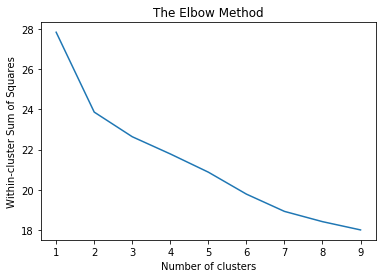

In [288]:
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

#### The Elbow Method suggested clustering Toronto in 2 different clusters

### 3.2.2. Clustering Neighborhoods of Toronto

In [264]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped2['Neighborhood']

for ind in np.arange(toronto_grouped2.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped2.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0               Agincourt North (129)    Chinese Restaurant   
1  Agincourt South-Malvern West (128)    Chinese Restaurant   
2                      Alderwood (20)           Pizza Place   
3                          Annex (95)        Sandwich Place   
4              Banbury-Don Mills (42)           Pizza Place   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0           Pizza Place    Dim Sum Restaurant  Fast Food Restaurant   
1         Shopping Mall                  Bank      Asian Restaurant   
2           Coffee Shop     Convenience Store              Pharmacy   
3                  Café                  Park                   Pub   
4          Gourmet Shop           Coffee Shop        Chocolate Shop   

  5th Most Common Venue      6th Most Common Venue 7th Most Common Venue  \
0          Liquor Store        Fried Chicken Joint    Frozen Yogurt Shop   
1      Malay Restaurant         Seafood Restaurant  Cantonese Restaurant   
2    Falafel Restaurant        Egyptian Restaurant     Electronics Store   
3     Convenience Store  Middle Eastern Restaurant            Restaurant   
4                   Spa                   Pharmacy   Sporting Goods Shop   

      8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0                Beer Store        Sandwich Place                 Bakery  
1  Mediterranean Restaurant            Restaurant           Noodle House  
2         Elementary School  Ethiopian Restaurant            Event Space  
3              Burger Joint           Coffee Shop      Indian Restaurant  
4             Shopping Mall          Liquor Store             Shoe Store

In [265]:
# set number of clusters
kclusters = 2

toronto_grouped2_clustering = toronto_grouped2.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped2_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:140] 

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [266]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged # check the 5 first columns!

AREA_SHORT_CODE                              Neighborhood  Longitude  \
0                 94                             Wychwood (94) -79.425515   
1                100                      Yonge-Eglinton (100) -79.403590   
2                 97                       Yonge-St.Clair (97) -79.397871   
3                 27              York University Heights (27) -79.488883   
4                 31                   Yorkdale-Glen Park (31) -79.457108   
5                114                  Lambton Baby Point (114) -79.496045   
6                 38                     Lansing-Westgate (38) -79.424748   
7                105                 Lawrence Park North (105) -79.403978   
8                103                 Lawrence Park South (103) -79.406039   
9                 56                   Leaside-Bennington (56) -79.366072   
10                84                      Little Portugal (84) -79.430323   
11                19                          Long Branch (19) -79.533345   
12               132                             Malvern (132) -79.222517   
13                29                           Maple Leaf (29) -79.480758   
14                12                        Markland Wood (12) -79.573432   
15               130                            Milliken (130) -79.275009   
16                17  Mimico (includes Humber Bay Shores) (17) -79.500137   
17               135                         Morningside (135) -79.207041   
18                73                            Moss Park (73) -79.367297   
19               115                        Mount Dennis (115) -79.499989   
20                 2     Mount Olive-Silverstone-Jamestown (2) -79.587259   
21                99                  Mount Pleasant East (99) -79.384924   
22               104                 Mount Pleasant West (104) -79.393360   
23                18                          New Toronto (18) -79.510358   
24                50                     Newtonbrook East (50) -79.405937   
25                36                     Newtonbrook West (36) -79.431422   
26                82                              Niagara (82) -79.412420   
27                68                      North Riverdale (68) -79.351260   
28                74                  North St.James Town (74) -79.375247   
29                54                    O'Connor-Parkview (54) -79.312228   
30               121                            Oakridge (121) -79.279708   
31               107                     Oakwood Village (107) -79.439785   
32                58                        Old East York (58) -79.335488   
33                80              Palmerston-Little Italy (80) -79.418409   
34                45                    Parkwoods-Donalda (45) -79.330180   
35                23                 Pelmo Park-Humberlea (23) -79.528282   
36                67             Playter Estates-Danforth (67) -79.354887   
37                46                        Pleasant View (46) -79.334948   
38                10                   Princess-Rosethorn (10) -79.544559   
39                72                          Regent Park (72) -79.360509   
40                 4                       Rexdale-Kipling (4) -79.566228   
41               111                   Rockcliffe-Smythe (111) -79.494420   
42                86                         Roncesvalles (86) -79.442992   
43                98                  Rosedale-Moore Park (98) -79.379669   
44               131                               Rouge (131) -79.186343   
45                89         Runnymede-Bloor West Village (89) -79.485708   
46                28                               Rustic (28) -79.498091   
47               139                 Scarborough Village (139) -79.216813   
48                85                       South Parkdale (85) -79.439338   
49                70                      South Riverdale (70) -79.335651   
50                40                 St.Andrew-Windfields (40) -79.379037   
5

In [267]:
toronto_merged = toronto_merged.dropna()

In [268]:
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].apply(np.int64)

C:\Users\sirpa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Let's put clusters in a map

In [269]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Let's analyze clusters and use a help of the top 15 list and where about the existing vegetarian places are

In [291]:
top15_n = top15['Neighborhood']
top15_n

61       Waterfront Communities-The Island (77)
26                                 Niagara (82)
68                         Willowdale East (51)
106    Dovercourt-Wallace Emerson-Junction (93)
71                                 Woburn (137)
22                    Mount Pleasant West (104)
97                   Church-Yonge Corridor (75)
132             Islington-City Centre West (14)
16     Mimico (includes Humber Bay Shores) (17)
77                                   Annex (95)
80                     Bay Street Corridor (76)
44                                  Rouge (131)
49                         South Riverdale (70)
139                            L'Amoreaux (117)
34                       Parkwoods-Donalda (45)
Name: Neighborhood, dtype: object

In [290]:
vegplaces_n = vegplaces['Neighborhood']
vegplaces_n

0                      Annex (95)
1       Kensington-Chinatown (78)
2            Little Portugal (84)
3       Mount Pleasant West (104)
4    Palmerston-Little Italy (80)
Name: Neighborhood, dtype: object

### Cluster 1 is in the map with red color

In [292]:
#Cluster 1 RED  
cluster1=toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

In [300]:
cluster1

Neighborhood  70K+_Total  High_Education_Total  \
5        Lambton Baby Point (114)        1625                  2670   
6           Lansing-Westgate (38)        2945                  6290   
15                 Milliken (130)        1295                  3815   
27           North Riverdale (68)        2775                  4495   
34         Parkwoods-Donalda (45)        3570                  8625   
62                West Hill (136)        1725                  4440   
64       Westminster-Branson (35)        1545                  6960   
69           Willowdale West (37)        2495                  6220   
79            Bathurst Manor (34)        1910                  4415   
82     Bayview Woods-Steeles (49)        1530                  3840   
85                  Bendale (127)        2100                  5685   
92       Brookhaven-Amesbury (30)         945                  2425   
94       Caledonia-Fairbank (109)         795                  1485   
95                 Casa Loma (96)        2445                  4260   
96   Centennial Scarborough (133)        2395                  3395   
99              Clanton Park (33)        2160                  4915   
107     Downsview-Roding-CFB (26)        2260                  5200   
110  Edenbridge-Humber Valley (9)        2540                  4400   
118       Forest Hill South (101)        2320                  4090   
119   Glenfield-Jane Heights (25)         920                  2720   
126        Hillcrest Village (48)        1740                  4940   
127  Humber Heights-Westmount (8)        1240                  2090   
138           Kingsway South (15)        2410                  3405   

     Cluster Labels 1st Most Common Venue  \
5                 0                Garden   
6                 0                  Park   
15                0                  Park   
27                0                  Park   
34                0     Food & Drink Shop   
62                0                  Park   
64                0  Gym / Fitness Center   
69                0     Mobile Phone Shop   
79                0     Convenience Store   
82                0               Dog Run   
85                0                  Park   
92                0                  Park   
94                0         Women's Store   
95                0                  Park   
96                0         Moving Target   
99                0                  Park   
107               0         Moving Target   
110               0               Dog Run   
118               0            Playground   
119               0              Pharmacy   
126               0                  Park   
127               0           Gas Station   
138               0                  Park   

                        2nd Most Common Venue 3rd Most Common Venue  \
5                                       River                  Park   
6                                         Zoo           Event Space   
15                             Sandwich Place      Sushi Restaurant   
27                                       Café                  Pool   
34                                       Park                   Zoo   
62                 Construction & Landscaping  Gym / Fitness Center   
64                                 Baby Store                  Park   
69                                       Park                   Zoo   
79                                 Playground        Baseball Field   
82                           Basketball Court                  Park   
85                             History Museum      Greek Restaurant   
92                                        Zoo           Event Space   
94                                     Market                  Park   
95                             History Museum            Steakhouse   
96                                       Park      Volleyball Court   
99                               Home Service           Event Space   
107                         

### Cluster 1 most common venues seem to be: Park, Eastern European Restaurant, Egyptian Restaurant, Ethiopian Restaurant. There don't appear to be room for variety.

### Let's see how it matches with the top 15 list

In [301]:
    
cluster1_n = cluster1['Neighborhood']
       
dup_n1 = cluster1_n.append(top15_n)  
r=dup_n1[dup_n1.duplicated(keep=False)]
r.drop_duplicates() 



34    Parkwoods-Donalda (45)
Name: Neighborhood, dtype: object

### Only one of those locations matched with the top 15 list. How about how many of the existing vegetarian restaurants reside in those locations?

In [302]:
dup_v1 = cluster1_n.append(vegplaces_n)  
v=dup_v1[dup_v1.duplicated(keep=False)]
v.drop_duplicates() 

Series([], Name: Neighborhood, dtype: object)

### None of the vegetarian restaurants resides in the cluster 1, so they all must be in the cluster 2

### Cluster 2 is in the map with a violet color

In [296]:
#Cluster 2 VIOLET 
cluster2=toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

In [297]:
cluster2

Neighborhood  70K+_Total  \
0                               Wychwood (94)        2060   
1                        Yonge-Eglinton (100)        2655   
2                         Yonge-St.Clair (97)        2885   
3                York University Heights (27)        1395   
4                     Yorkdale-Glen Park (31)        1315   
7                   Lawrence Park North (105)        4120   
8                   Lawrence Park South (103)        3995   
9                     Leaside-Bennington (56)        4355   
10                       Little Portugal (84)        2405   
11                           Long Branch (19)        1520   
12                              Malvern (132)        1870   
13                            Maple Leaf (29)         770   
14                         Markland Wood (12)        1745   
16   Mimico (includes Humber Bay Shores) (17)        6385   
17                          Morningside (135)        1020   
18                             Moss Park (73)        4050   
19                         Mount Dennis (115)         655   
20      Mount Olive-Silverstone-Jamestown (2)         940   
21                   Mount Pleasant East (99)        4170   
22                  Mount Pleasant West (104)        5715   
23                           New Toronto (18)        1455   
24                      Newtonbrook East (50)        1735   
26                               Niagara (82)        9395   
28                   North St.James Town (74)        1425   
29                     O'Connor-Parkview (54)        2150   
30                             Oakridge (121)         570   
31                      Oakwood Village (107)        2280   
32                         Old East York (58)        1600   
33               Palmerston-Little Italy (80)        2195   
35                  Pelmo Park-Humberlea (23)        1180   
36              Playter Estates-Danforth (67)        1645   
37                         Pleasant View (46)        1475   
38                    Princess-Rosethorn (10)        2475   
39                           Regent Park (72)         955   
40                        Rexdale-Kipling (4)         785   
41                    Rockcliffe-Smythe (111)        1625   
42                          Roncesvalles (86)        2575   
43                   Rosedale-Moore Park (98)        5165   
44                                Rouge (131)        4730   
45          Runnymede-Bloor West Village (89)        2525   
47                  Scarborough Village (139)         880   
48                        South Parkdale (85)        1770   
49                       South Riverdale (70)        5680   
51                              Steeles (116)        1640   
52                   Stonegate-Queensway (16)        4800   
53               Tam O'Shanter-Sullivan (118)        1955   
54                         Taylor-Massey (61)         880   
55                           The Beaches (63)        5490   
56           Thistletown-Beaumond Heights (3)         650   
57                      Thorncliffe Park (55)         980   
58                     Trinity-Bellwoods (81)        2520   
59                            University (79)        1050   
60                      Victoria Village (43)        1360   
61     Waterfront Communities-The Island (77)       19820   
63                 West Humber-Clairville (1)        1890   
65                               Weston (113)        1190   
66                    Weston-Pellam Park (91)         905   
67                     Wexford/Maryvale (119)        2150   
68                       Willowdale East (51)        7450   
70       Willowridge-Martingrove-Richview (7)        2500   
71                               Woburn (137)        2960   
72                     Woodbine Corridor (64)        2590   
73                      Woodbine-Lumsden (60)        1420   
74                      Agincourt North (129)        1620   
75         Agincourt South-Malvern West (128)        1595   
76     

### Cluster 2: It can be seen immediately that these locations are more versatile and multicultural than in the cluster 1. Cluster 2 has something for everybody.

In [303]:
cluster2_n = cluster2['Neighborhood']
cluster2_n.count()

dup_n2 = cluster2_n.append(top15_n)  
r2=dup_n2[dup_n2.duplicated(keep=False)]
r2.drop_duplicates() 

16     Mimico (includes Humber Bay Shores) (17)
22                    Mount Pleasant West (104)
26                                 Niagara (82)
44                                  Rouge (131)
49                         South Riverdale (70)
61       Waterfront Communities-The Island (77)
68                         Willowdale East (51)
71                                 Woburn (137)
77                                   Annex (95)
80                     Bay Street Corridor (76)
97                   Church-Yonge Corridor (75)
106    Dovercourt-Wallace Emerson-Junction (93)
132             Islington-City Centre West (14)
139                            L'Amoreaux (117)
Name: Neighborhood, dtype: object

### Also, 14 out of 15 locations on the top 15 list are is the cluster 2

In [299]:
dup_v2 = cluster2_n.append(vegplaces_n)  
v2=dup_v2[dup_v2.duplicated(keep=False)]
v2.drop_duplicates() 

10             Little Portugal (84)
22        Mount Pleasant West (104)
33     Palmerston-Little Italy (80)
77                       Annex (95)
136       Kensington-Chinatown (78)
Name: Neighborhood, dtype: object

### and so are all of the current vegetarian restaurants.

# 4. Results

# 5. Discussion

# 6. Conclusion